# Uso de ecobicis vs. Temperatura en CABA

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
from scripts.data import (
    analysis_temperature,
    merge_recorridos_temperaturas,
)
from scripts.correlation import correlation_analysis

## Temperatura Promedio en CABA

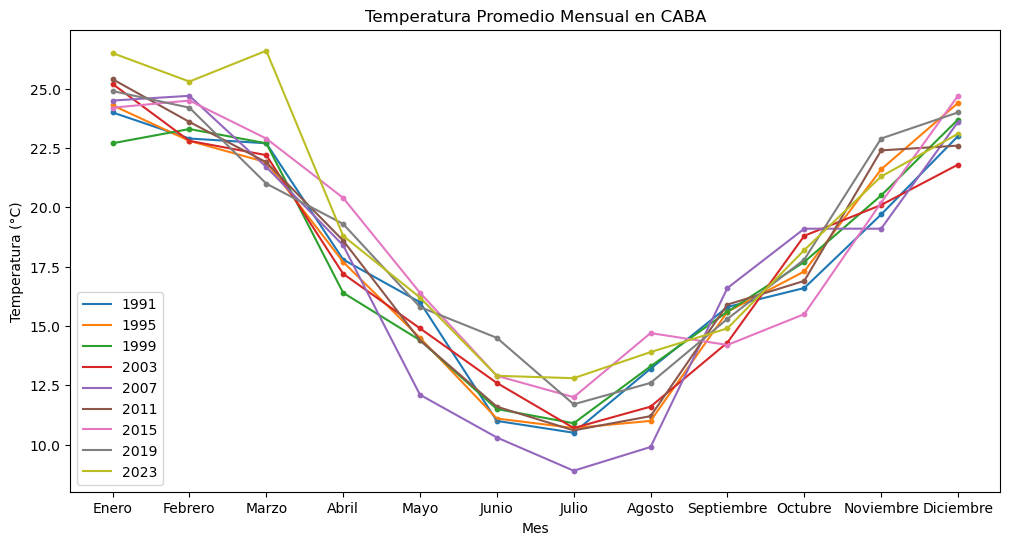

In [2]:
temperaturas = analysis_temperature()
temperaturas = pd.DataFrame(temperaturas[temperaturas["TempMean"].notna()])

fig, ax = plt.subplots(figsize=(12, 6))

target_years = range(1991, 2024, 4)
for year, temp in temperaturas.groupby("Year"):
    if year not in target_years:
        continue

    months = temp.index.get_level_values(1)
    means = temp["TempMean"]
    ax.plot(months, means, label=year)
    ax.scatter(months, means, s=10)

ax.set_title("Temperatura Promedio Mensual en CABA")

ax.set_xlabel("Mes")
ax.set_ylabel("Temperatura (°C)")

ax.legend()
plt.show()

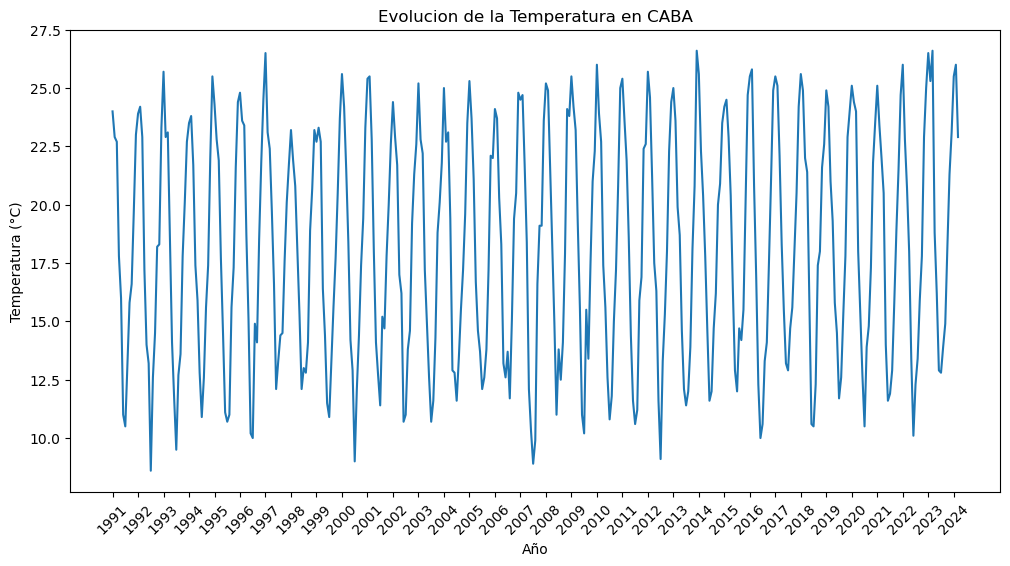

In [3]:
months = temperaturas.index.get_level_values(1).unique().tolist()
data = temperaturas[["TempMean"]].reset_index()
data["MonthNum"] = data["Month"].apply(months.index)
data.sort_values(["Year", "MonthNum"], inplace=True, ignore_index=True)

ticks = data[data["Month"] == "Enero"].index.values
tick_labels = data[data["Month"] == "Enero"]["Year"]

fig, ax = plt.subplots(figsize=(12, 6))

ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels, rotation=45)
ax.plot(data["TempMean"], label="Mean")

ax.set_title("Evolucion de la Temperatura en CABA")
ax.set_xlabel("Año")
ax.set_ylabel("Temperatura (°C)")

plt.show()

## Uso de Ecobicis

In [4]:
recorridos_data = pd.read_csv("data/recorridos-realizados-todo.csv", low_memory=False)
recorridos_data.head()

ORIGEN                    FECHA GENERO  MES_NUM  ANIO    MES
0             ONCE  2014-01-02 08:03:44.437    NaN        1  2014  Enero
1         SUIPACHA  2014-01-02 08:33:59.873    NaN        1  2014  Enero
2         CONGRESO  2014-01-02 08:43:09.263    NaN        1  2014  Enero
3  VIRREY CEVALLOS  2014-01-02 08:43:37.700    NaN        1  2014  Enero
4           RETIRO  2014-01-02 08:47:58.217    NaN        1  2014  Enero

### Recorridos en el Tiempo

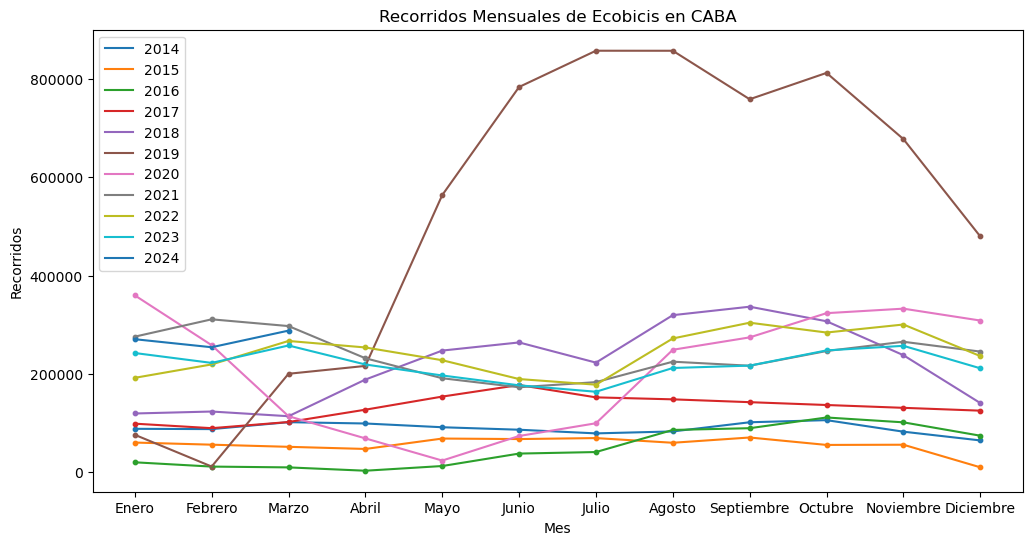

In [5]:
target_data = merge_recorridos_temperaturas(recorridos_data, temperaturas)
data = target_data[["ANIO", "MES_NUM", "MES", "RECORRIDOS"]]

fig, ax = plt.subplots(figsize=(12, 6))

for year, recs in data.groupby("ANIO"):
    xs = recs["MES"]
    ys = recs["RECORRIDOS"]
    ax.plot(xs, ys, label=year)
    ax.scatter(xs, ys, s=10)

ax.legend()
ax.set_title("Recorridos Mensuales de Ecobicis en CABA")
ax.set_xlabel("Mes")
ax.set_ylabel("Recorridos")

plt.show()

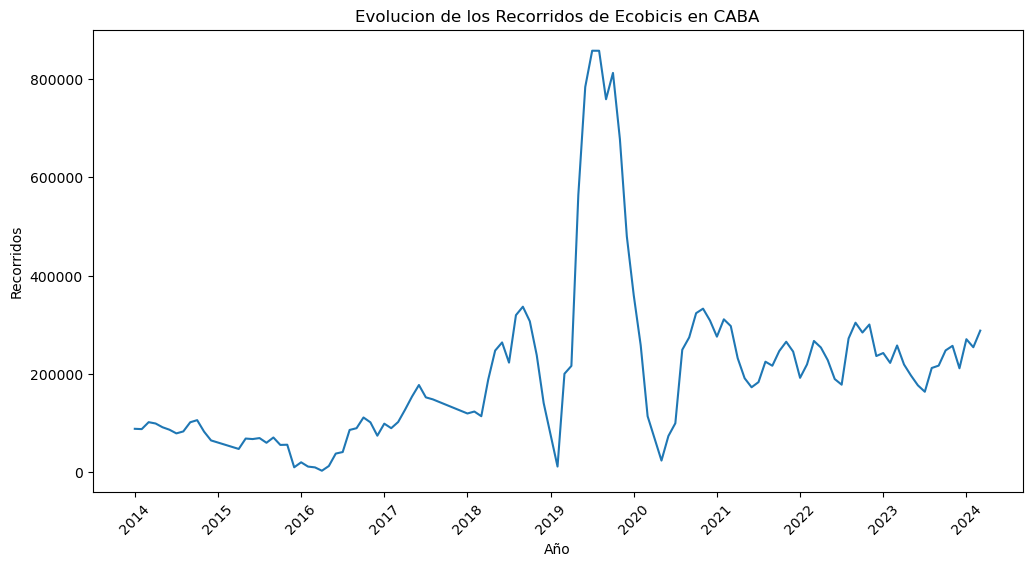

In [6]:
ticks = target_data[target_data["MES"] == "Enero"].index.values
tick_labels = target_data[target_data["MES"] == "Enero"]["ANIO"]

fig, ax = plt.subplots(figsize=(12, 6))

ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels, rotation=45)
ax.plot(target_data["RECORRIDOS"])

ax.set_title("Evolucion de los Recorridos de Ecobicis en CABA")
ax.set_xlabel("Año")
ax.set_ylabel("Recorridos")

plt.show()

### Demografía

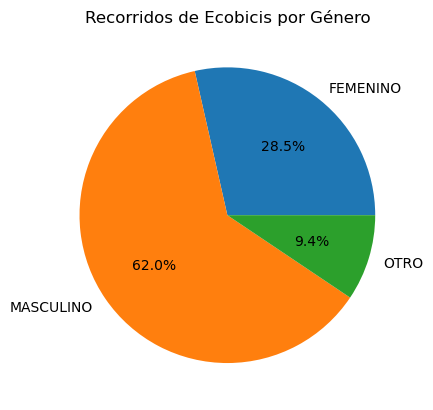

In [7]:
data = pd.DataFrame(
    recorridos_data[recorridos_data["GENERO"].notna()]
    .groupby("GENERO", as_index=False)
    .size()
).rename(columns={"size": "RECORRIDOS"})

labels = data["GENERO"]
counts = data["RECORRIDOS"]
total = counts.sum()

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct=lambda n: f"{n:.1f}%")

ax.set_title("Recorridos de Ecobicis por Género")

plt.show()

## Correlación

### Analisis de Correlación por Grupos

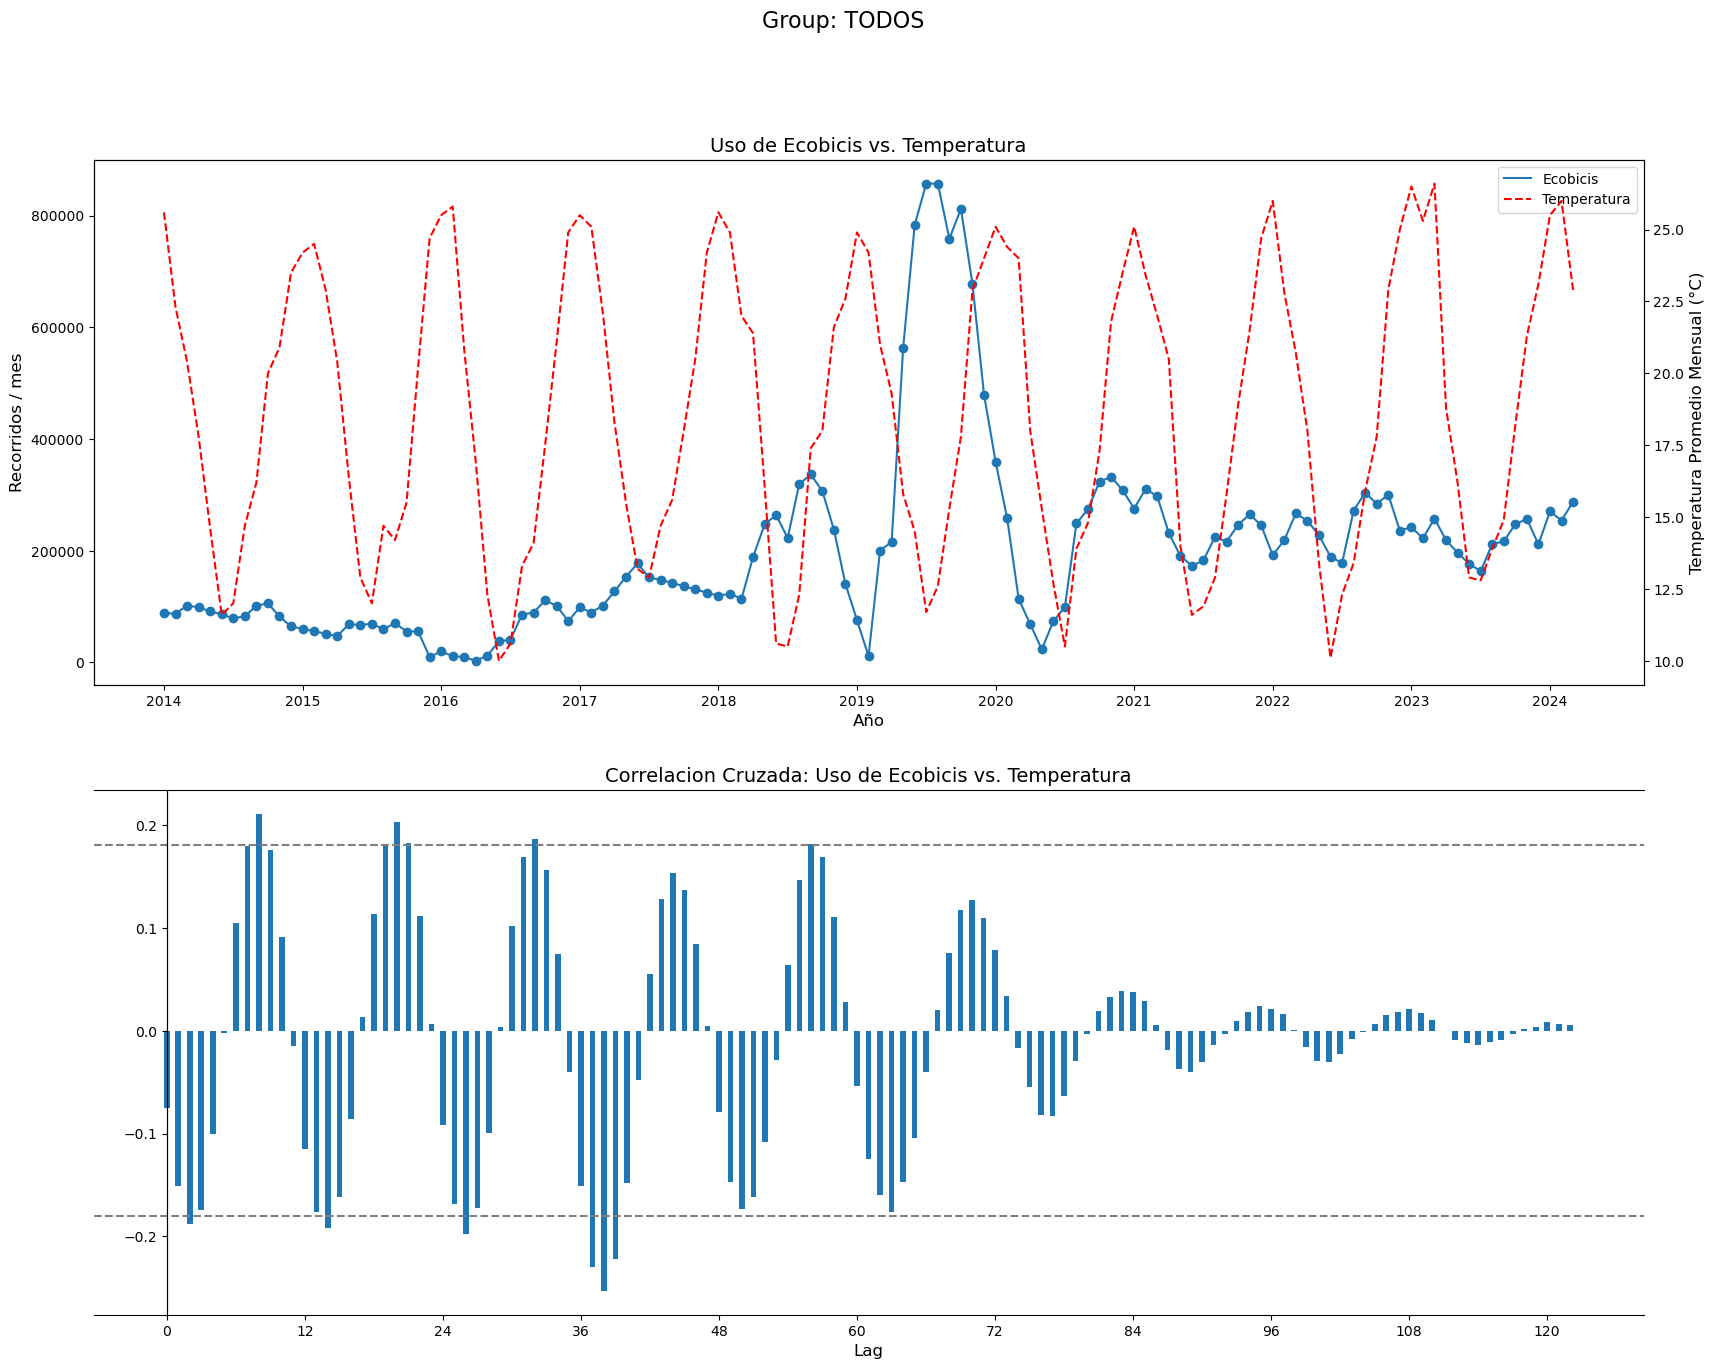

Coeficiente de Correlacion de Pearson: -0.07516916653179825


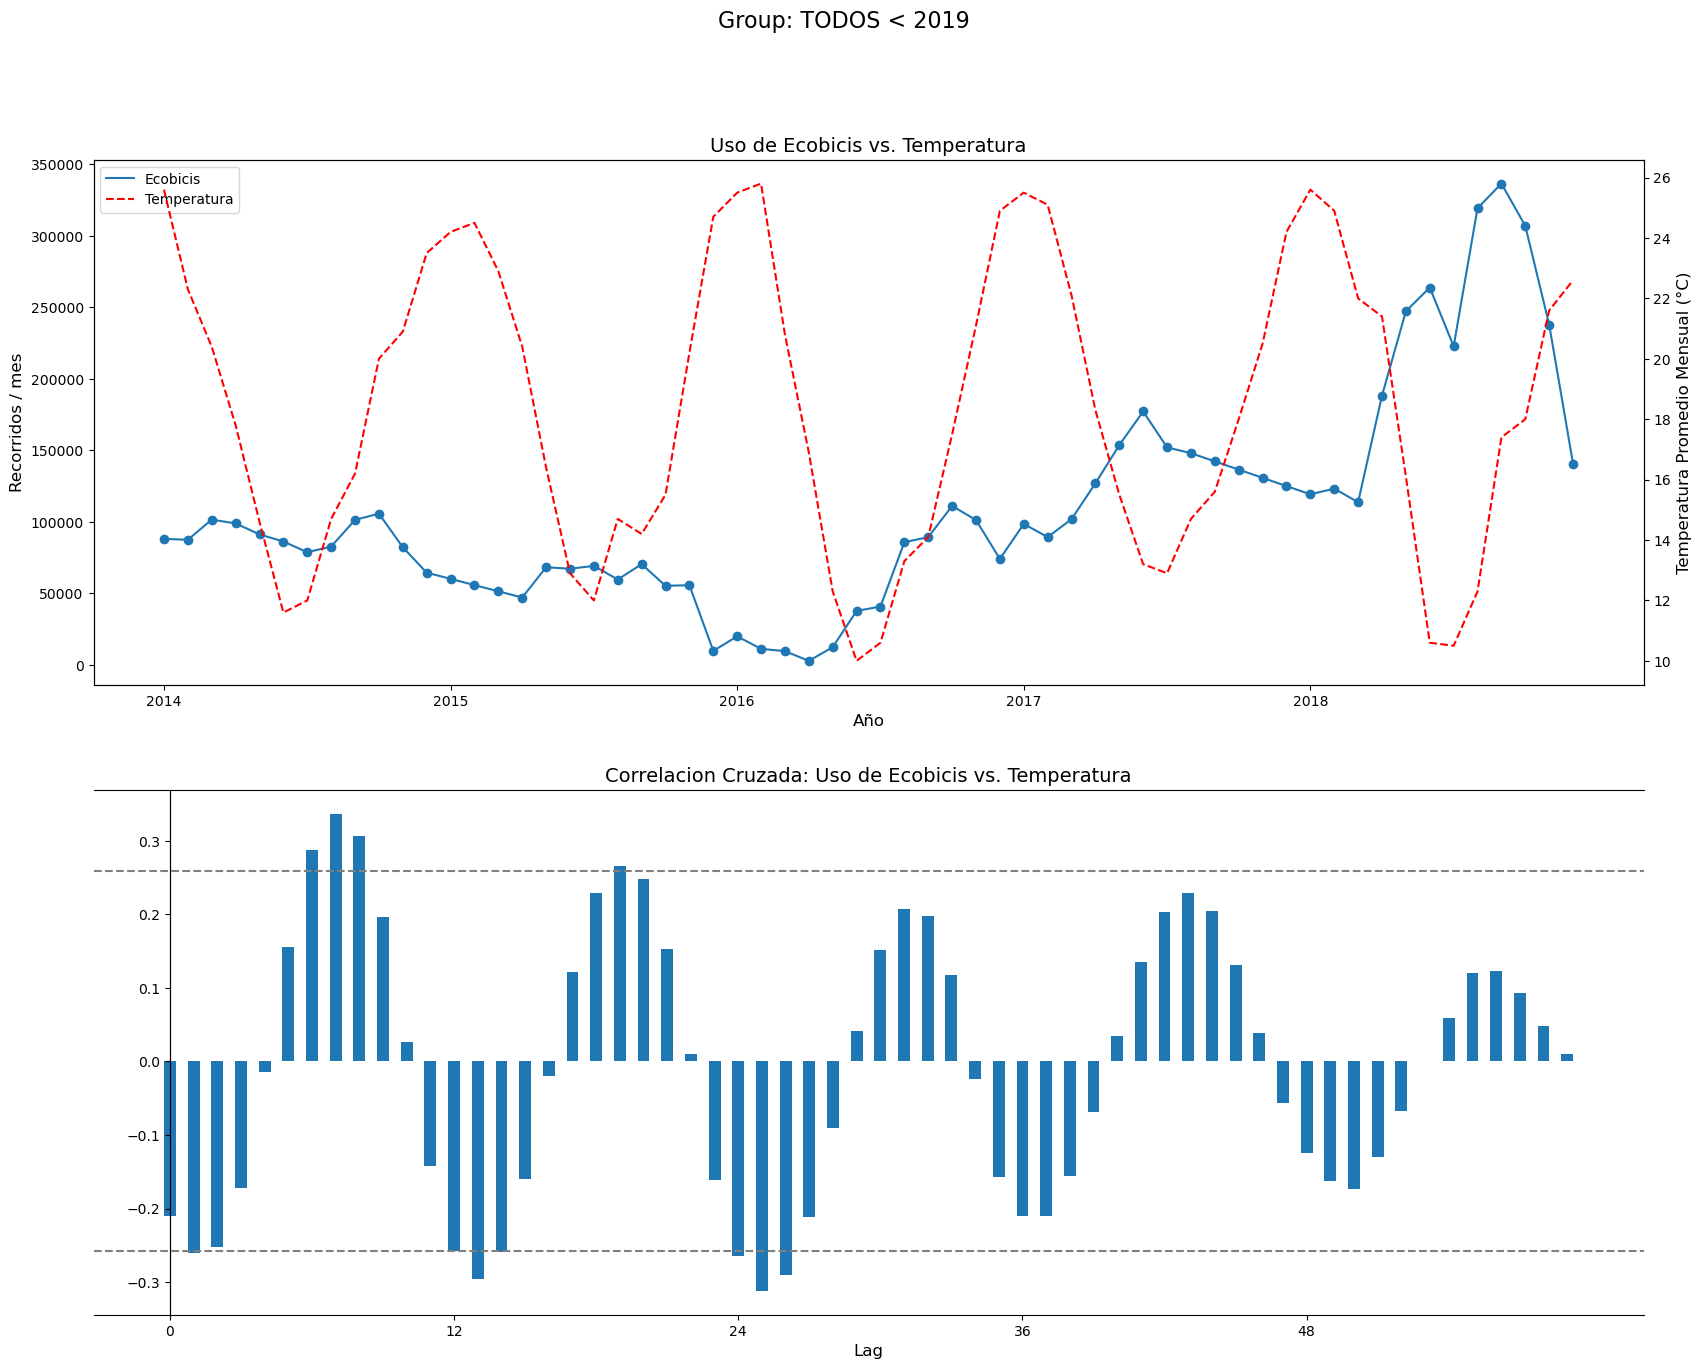

Coeficiente de Correlacion de Pearson: -0.21017203867638287


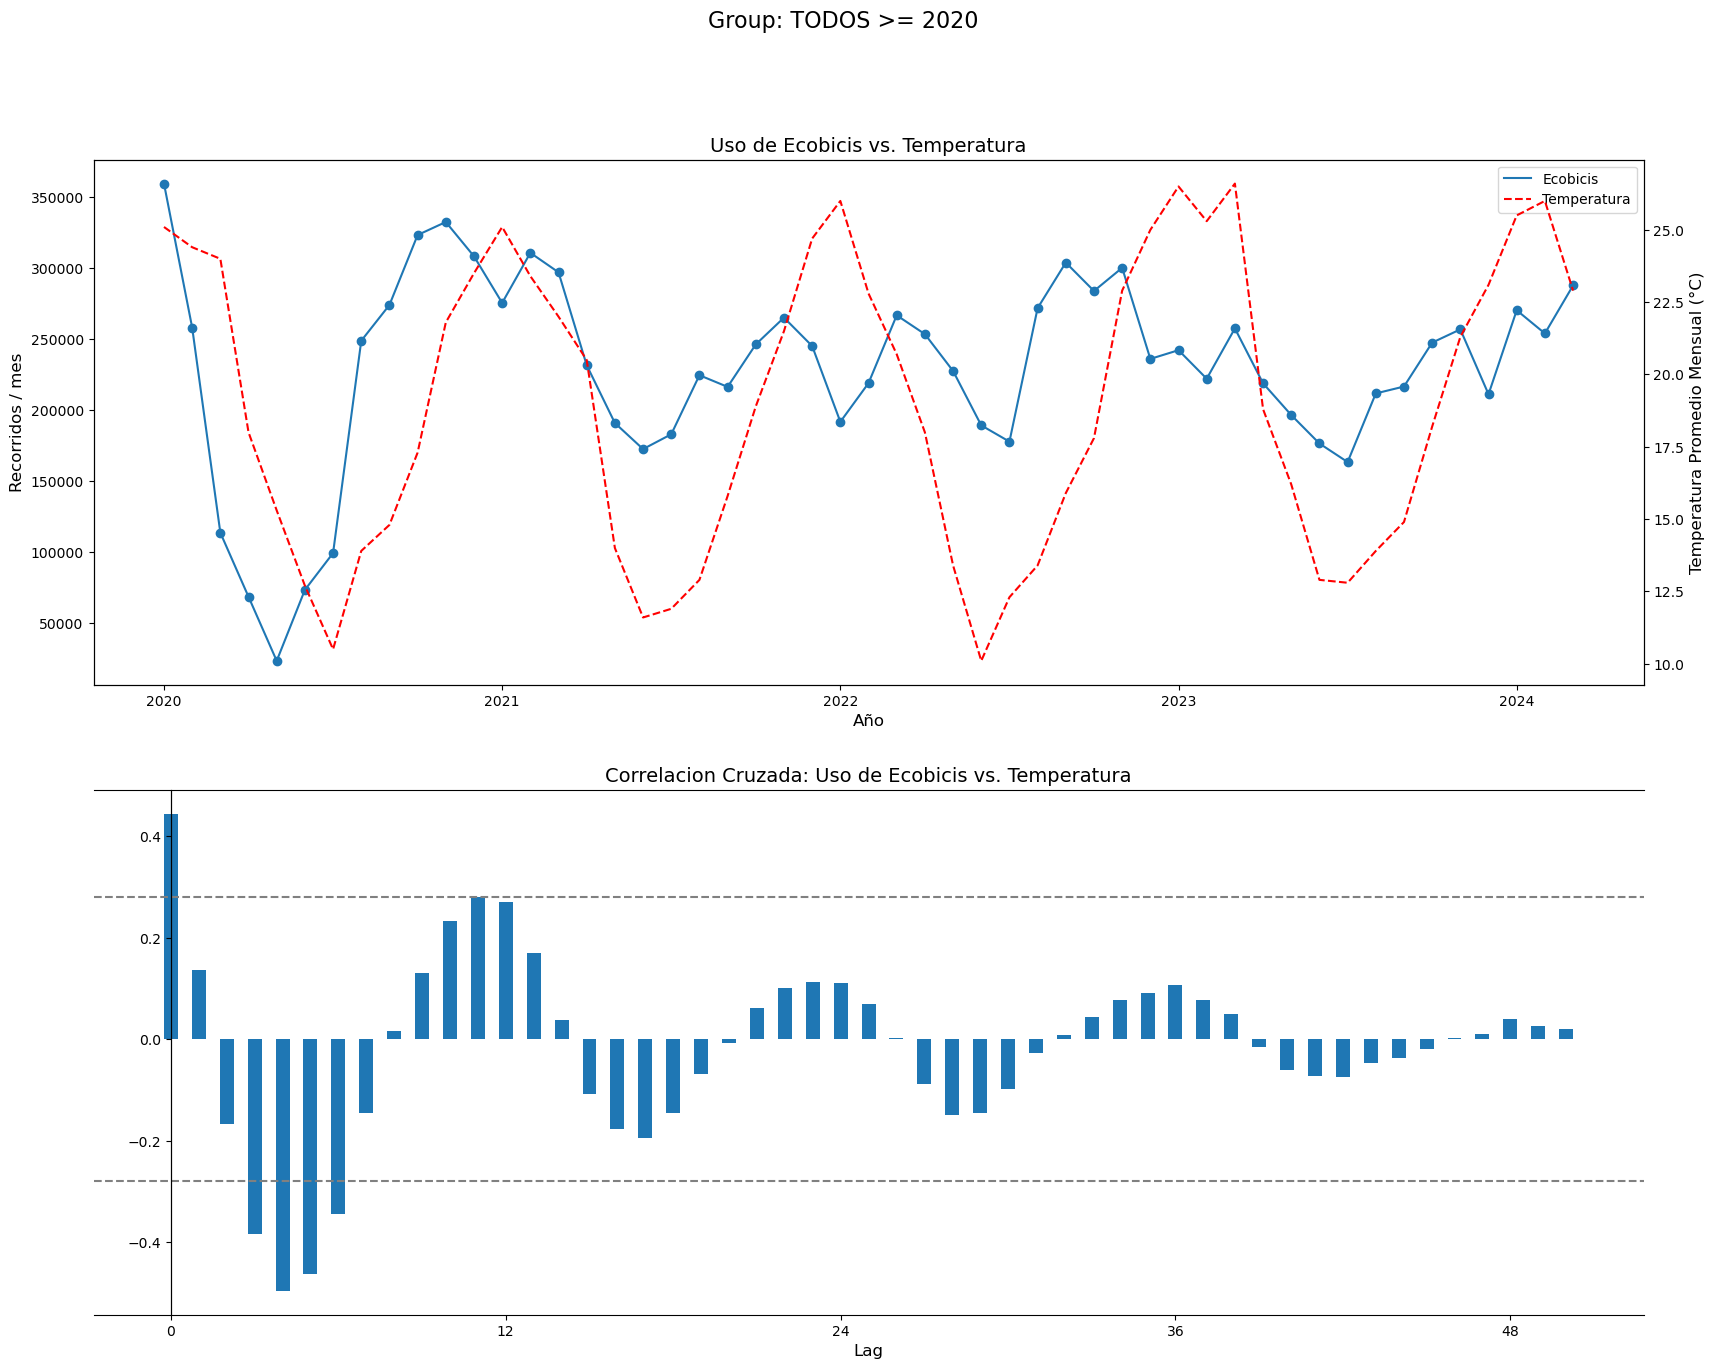

Coeficiente de Correlacion de Pearson: 0.44501352430843155


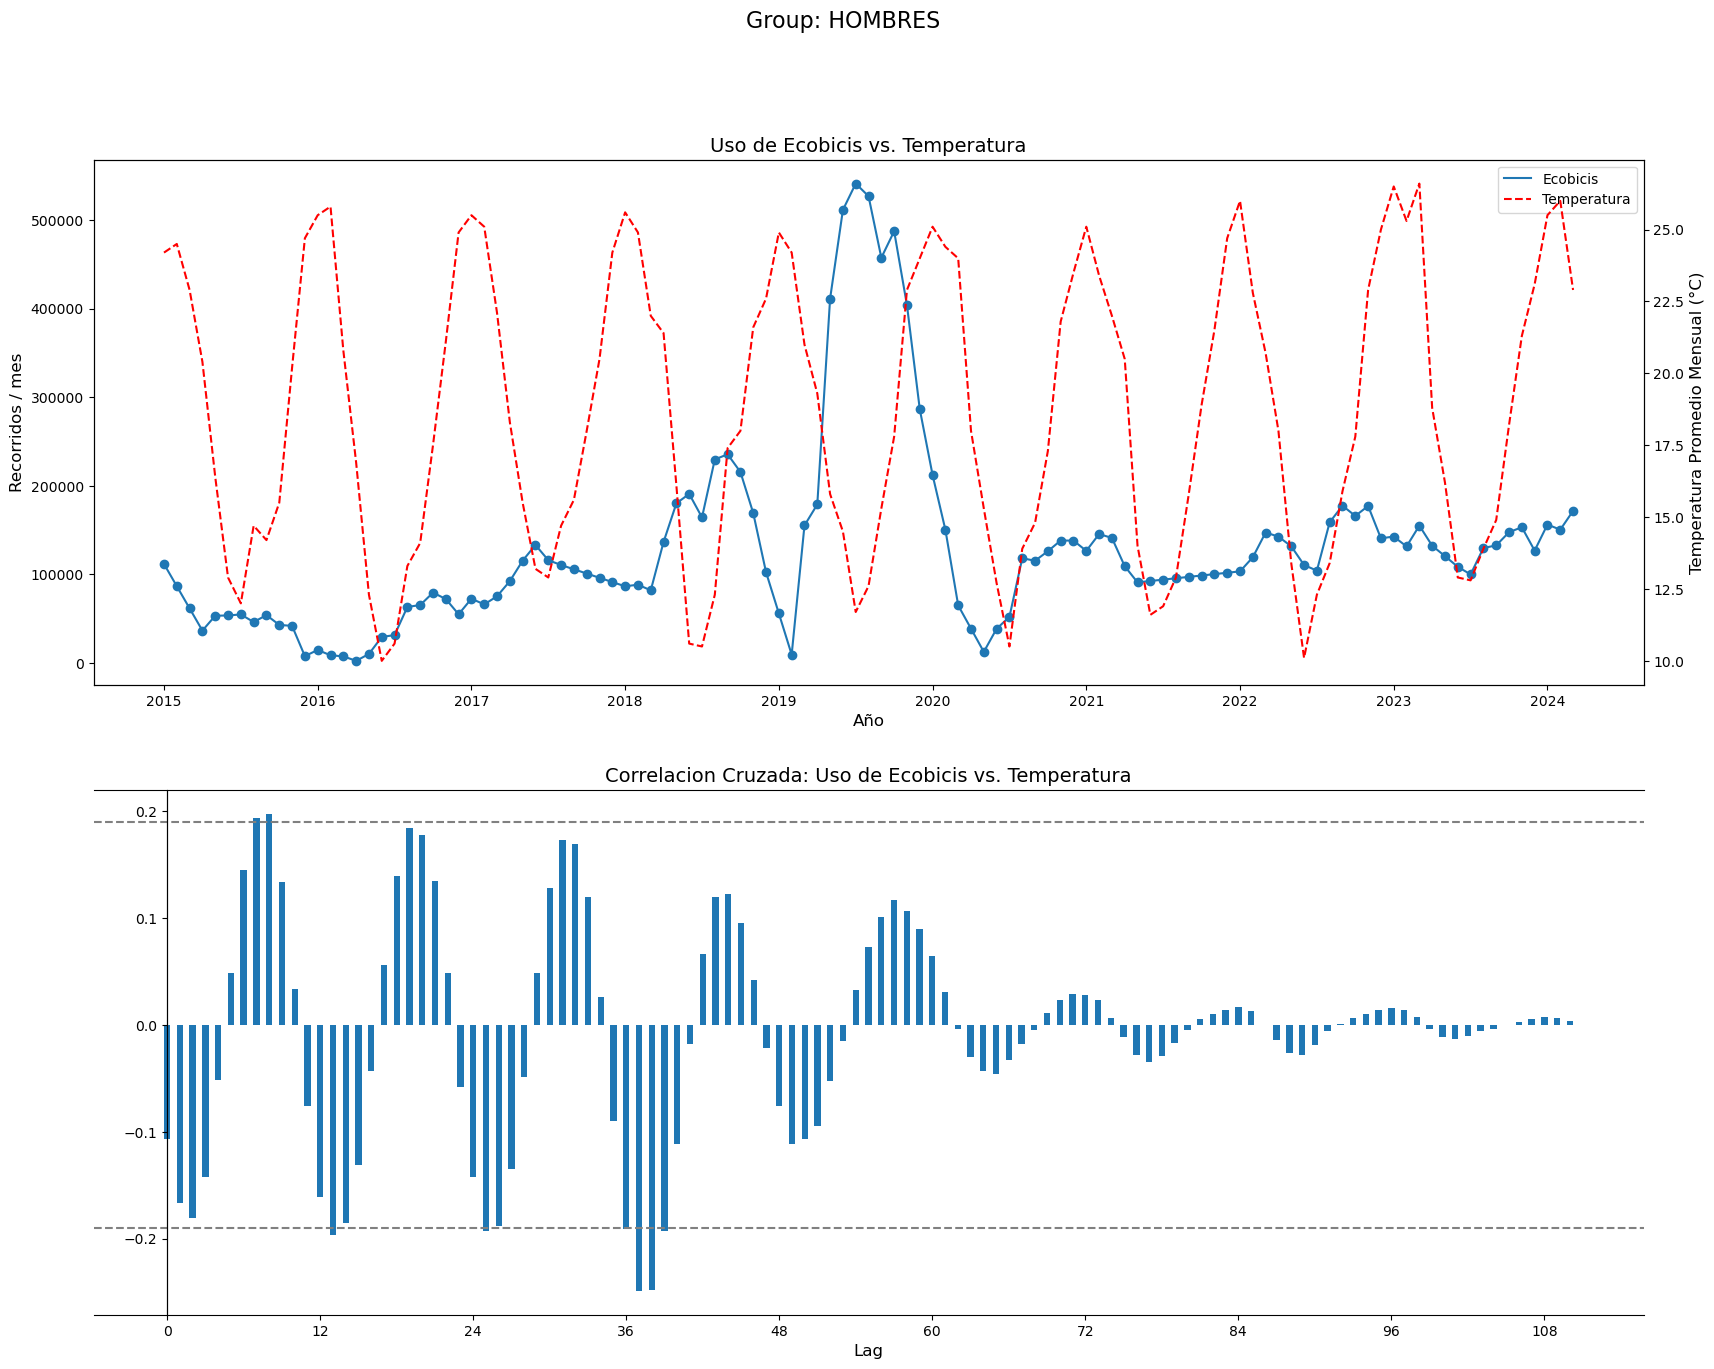

Coeficiente de Correlacion de Pearson: -0.10636588271430904


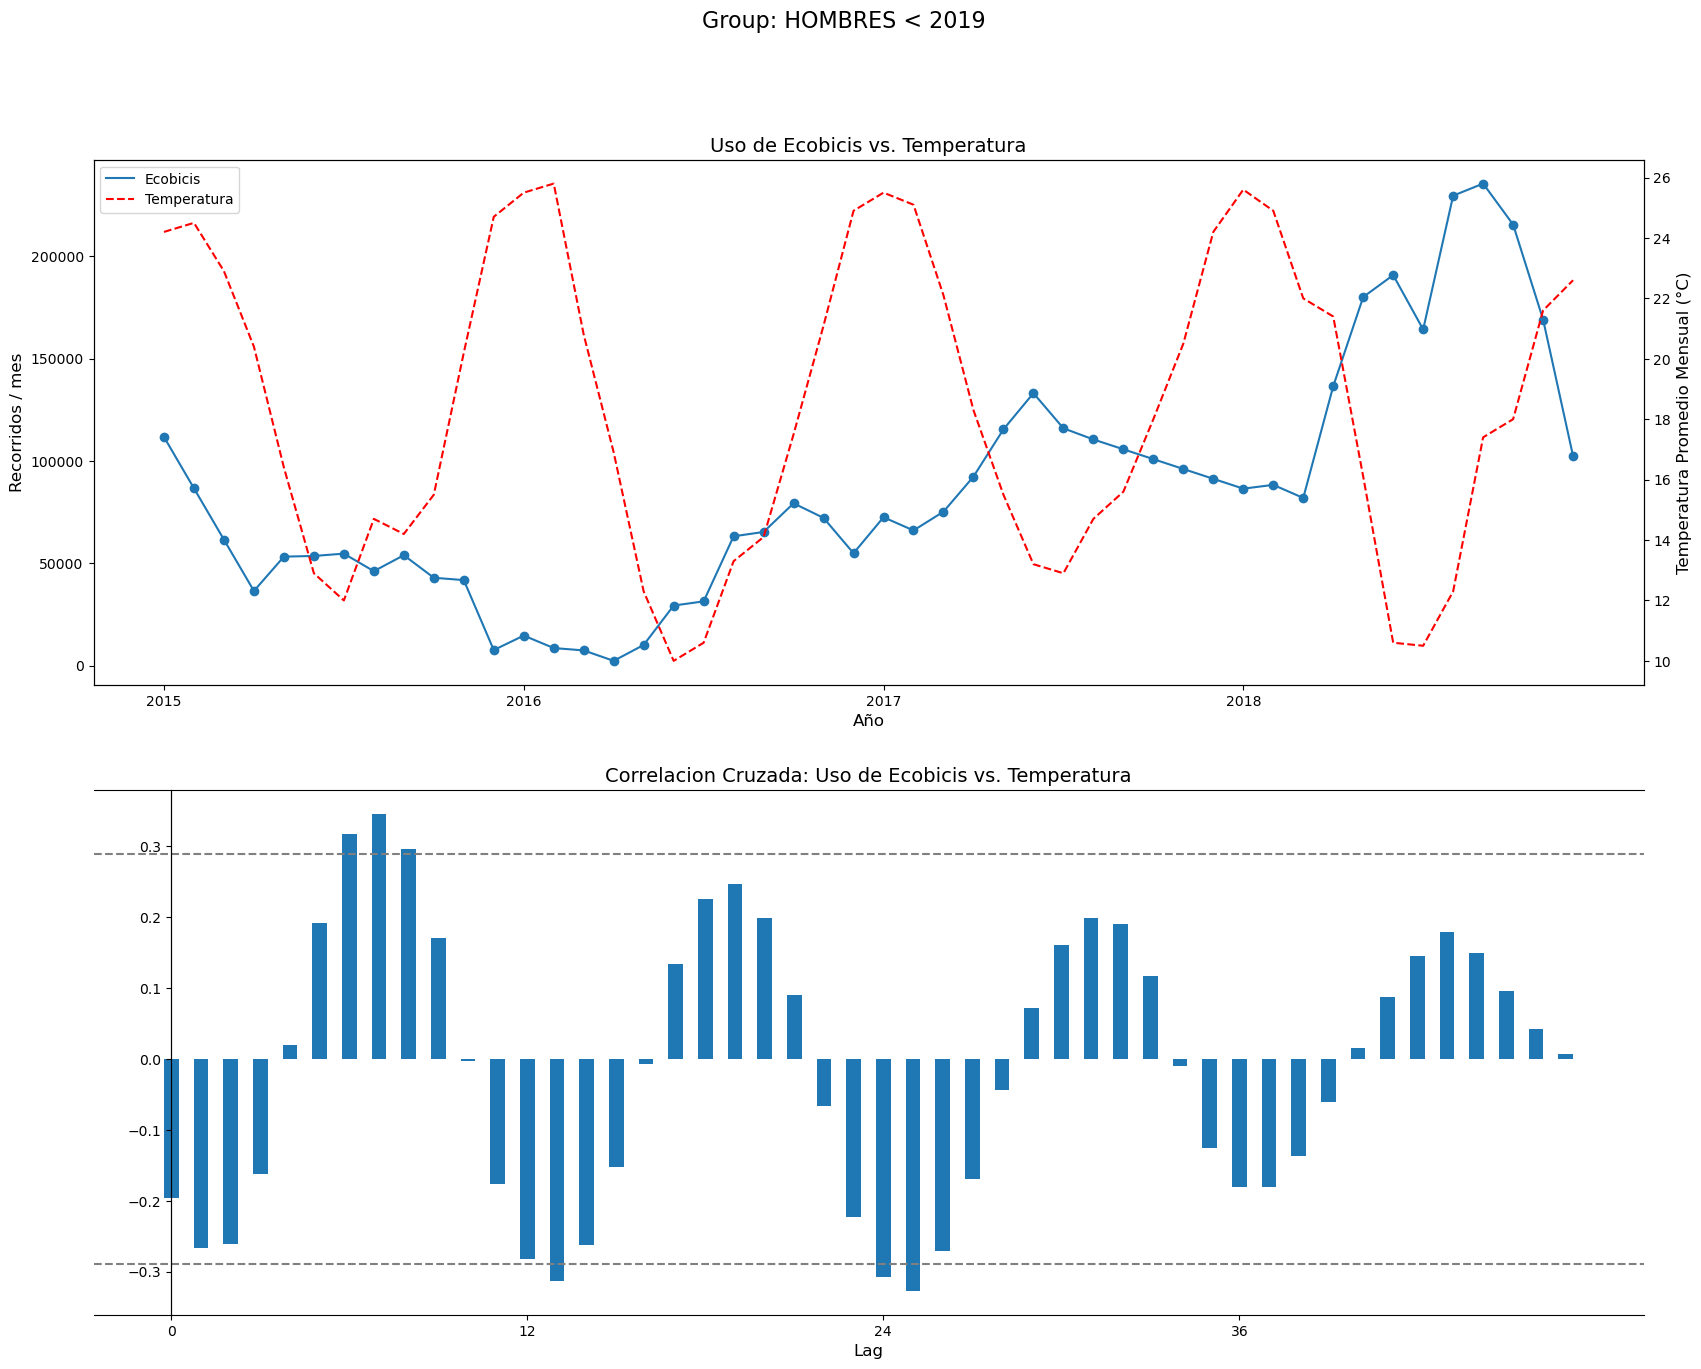

Coeficiente de Correlacion de Pearson: -0.196581598392226


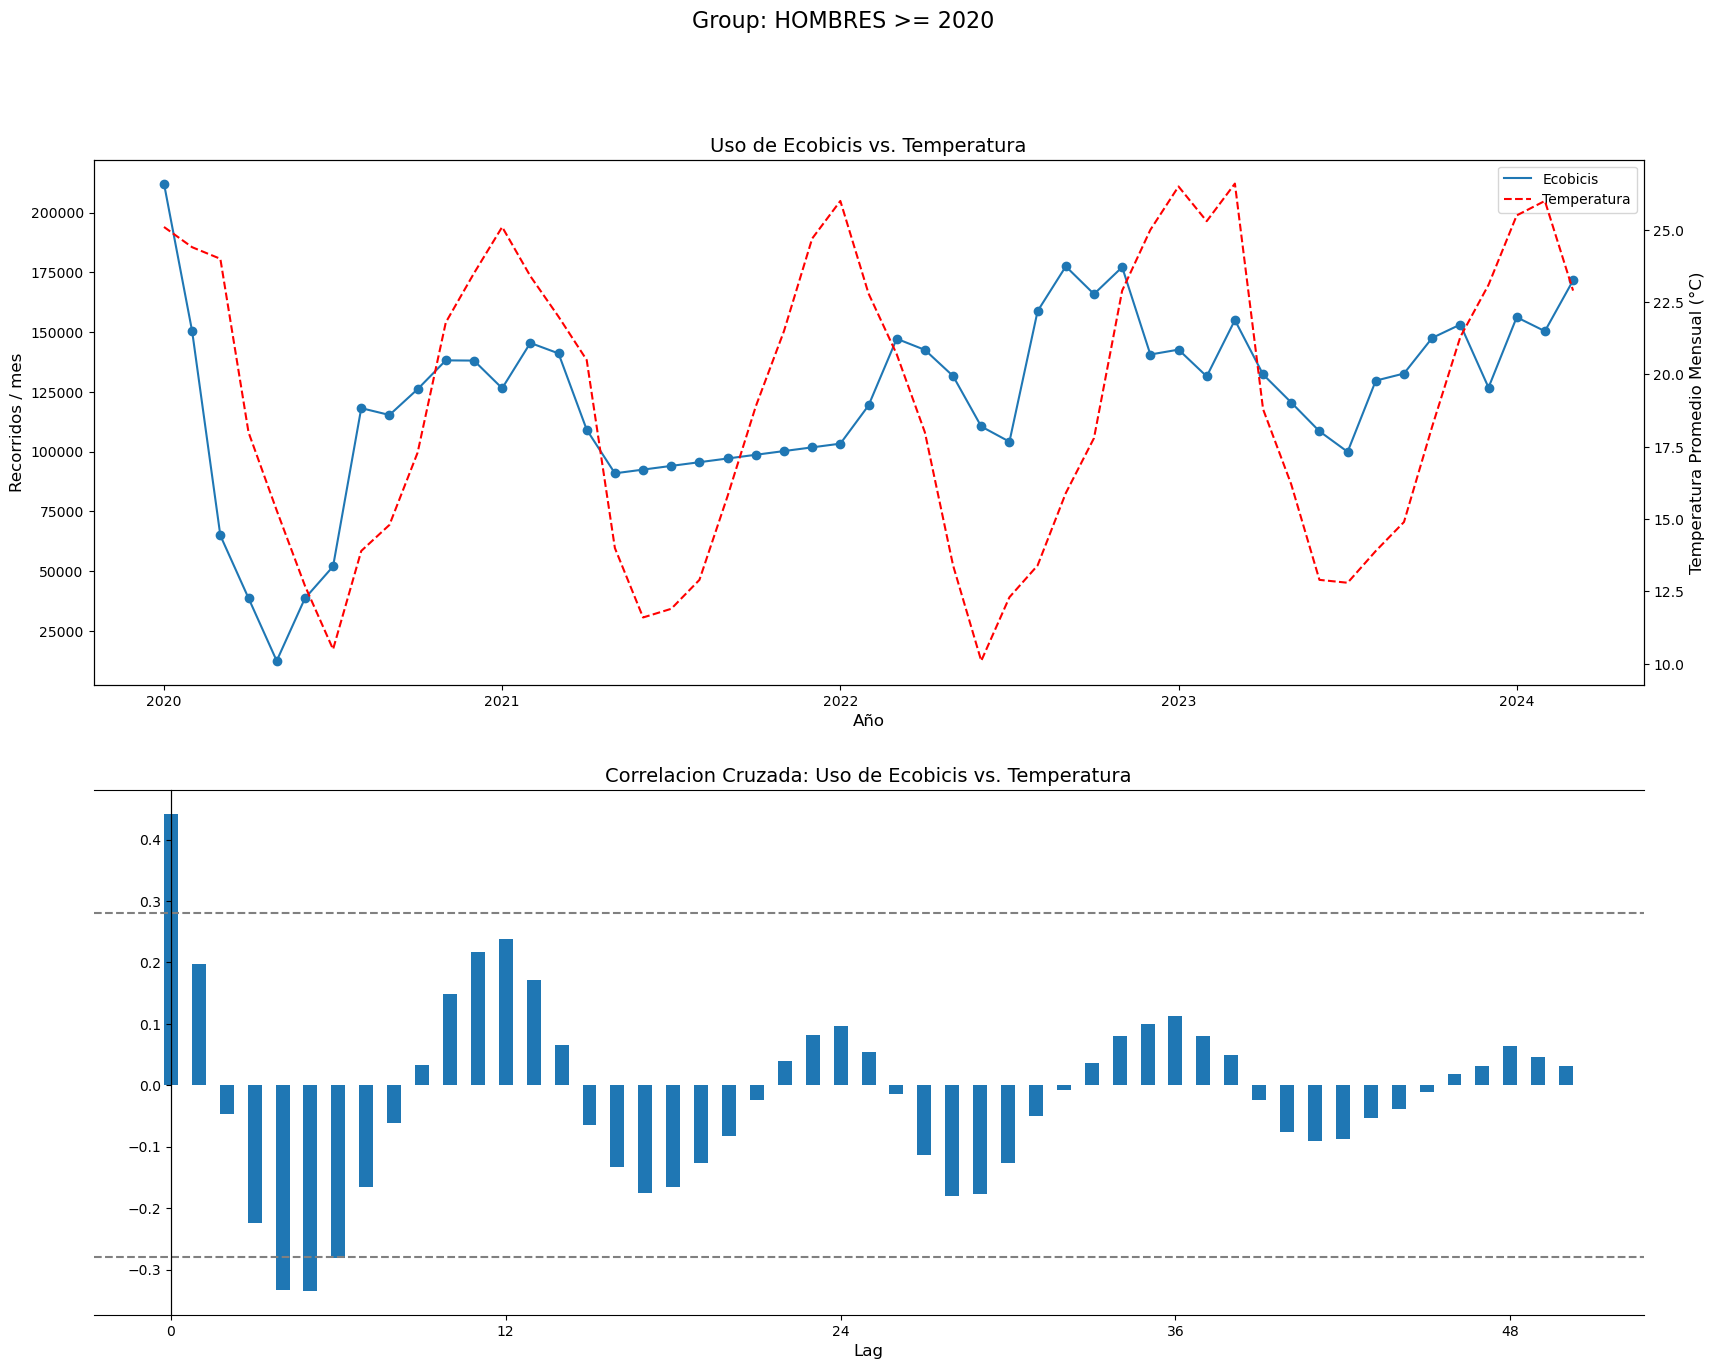

Coeficiente de Correlacion de Pearson: 0.4422699840876626


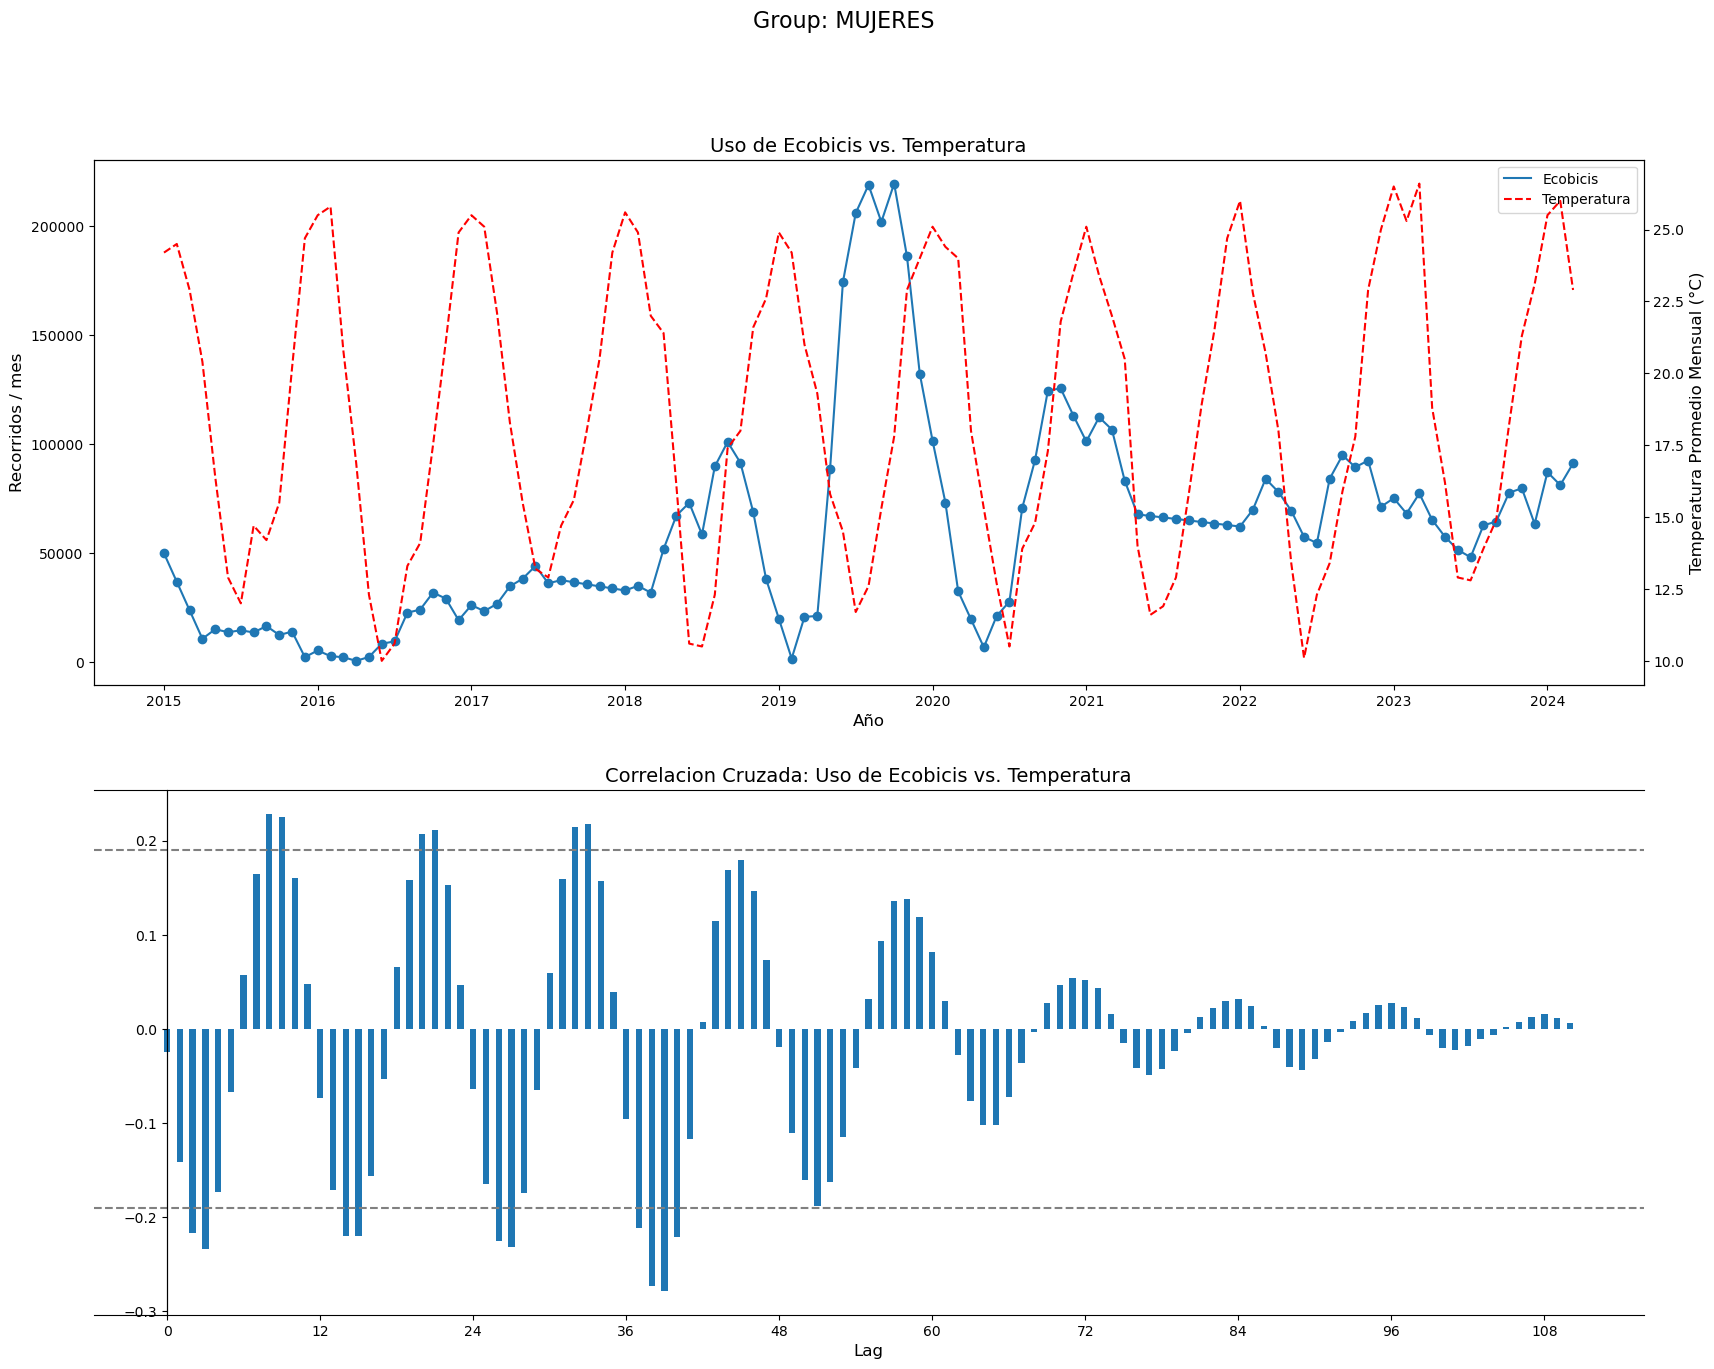

Coeficiente de Correlacion de Pearson: -0.024233788618077824


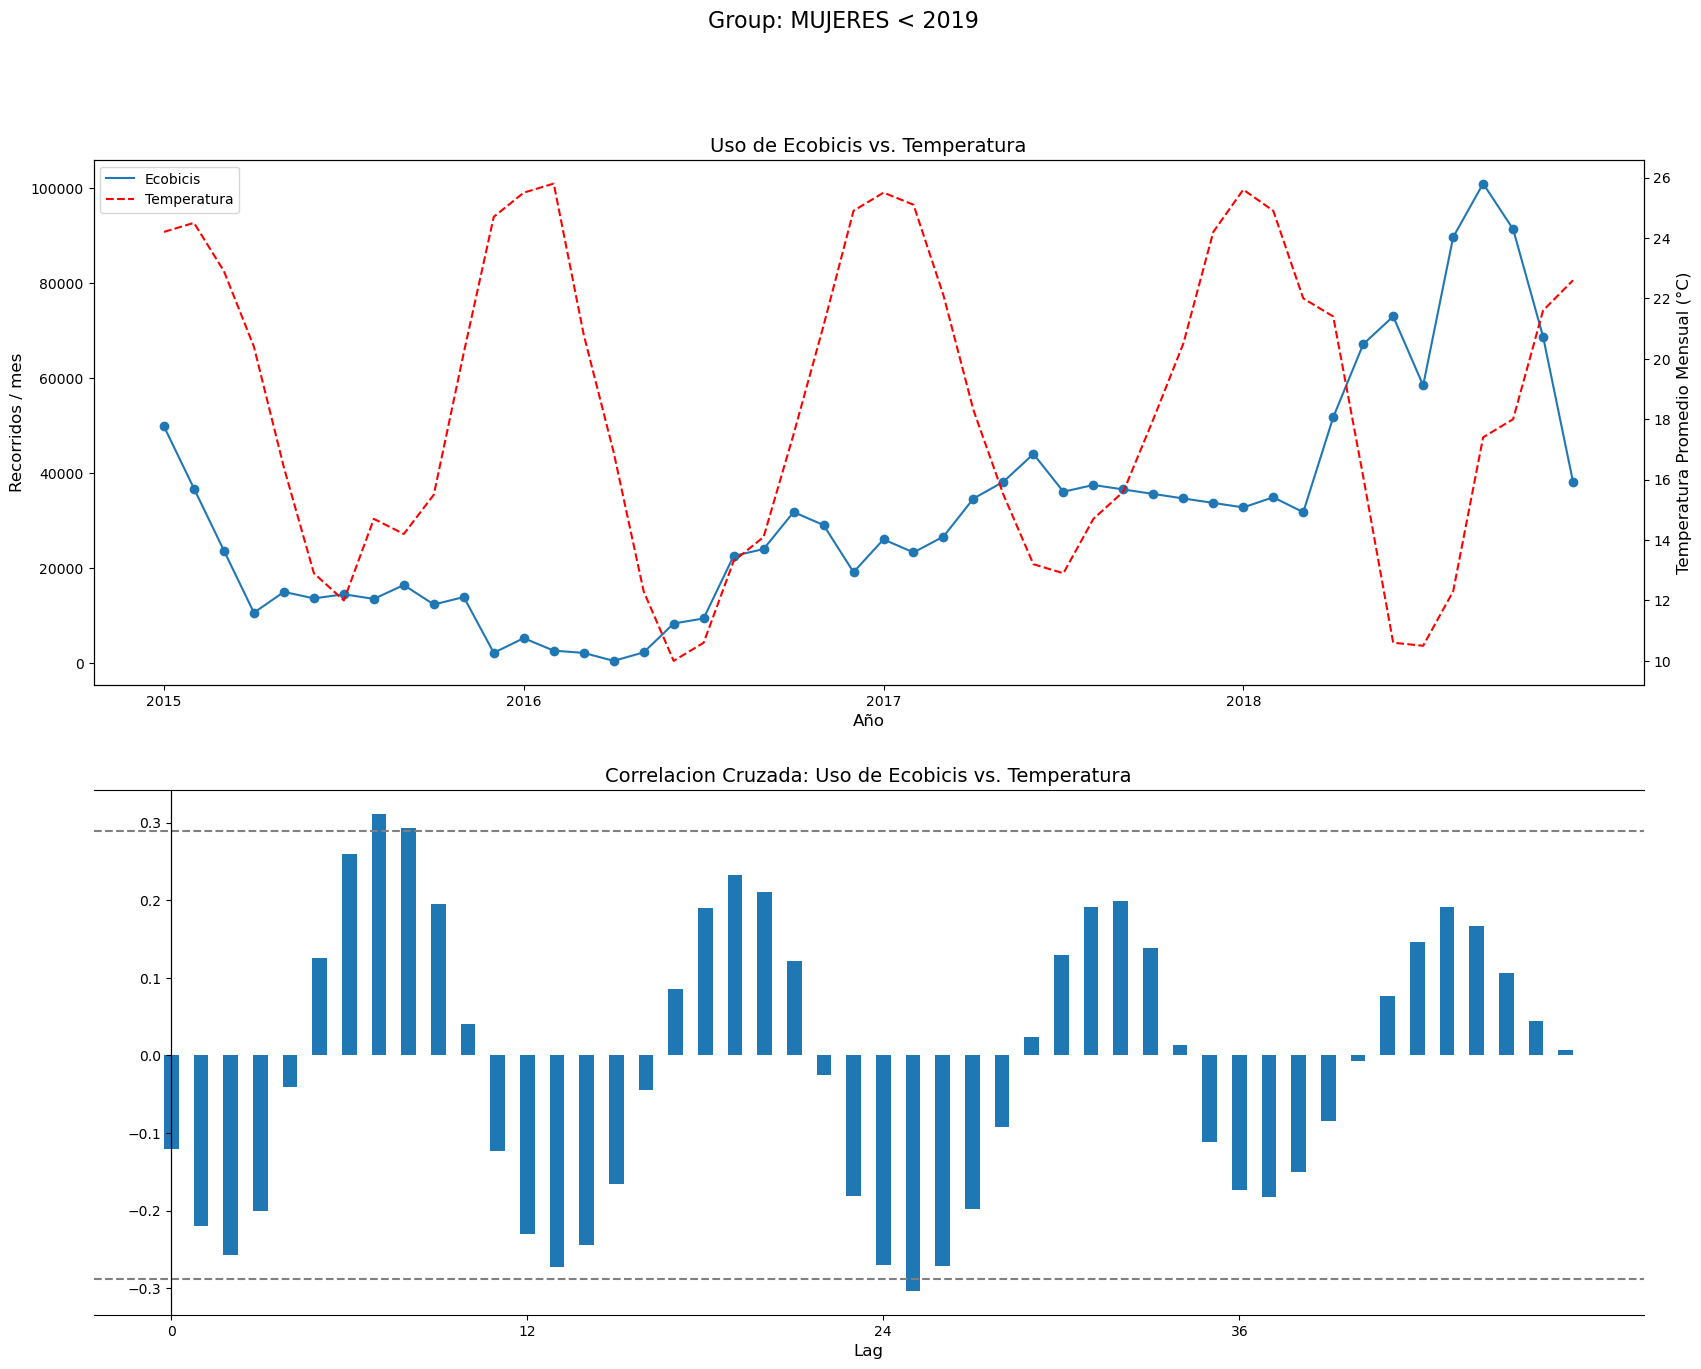

Coeficiente de Correlacion de Pearson: -0.12122195375759603


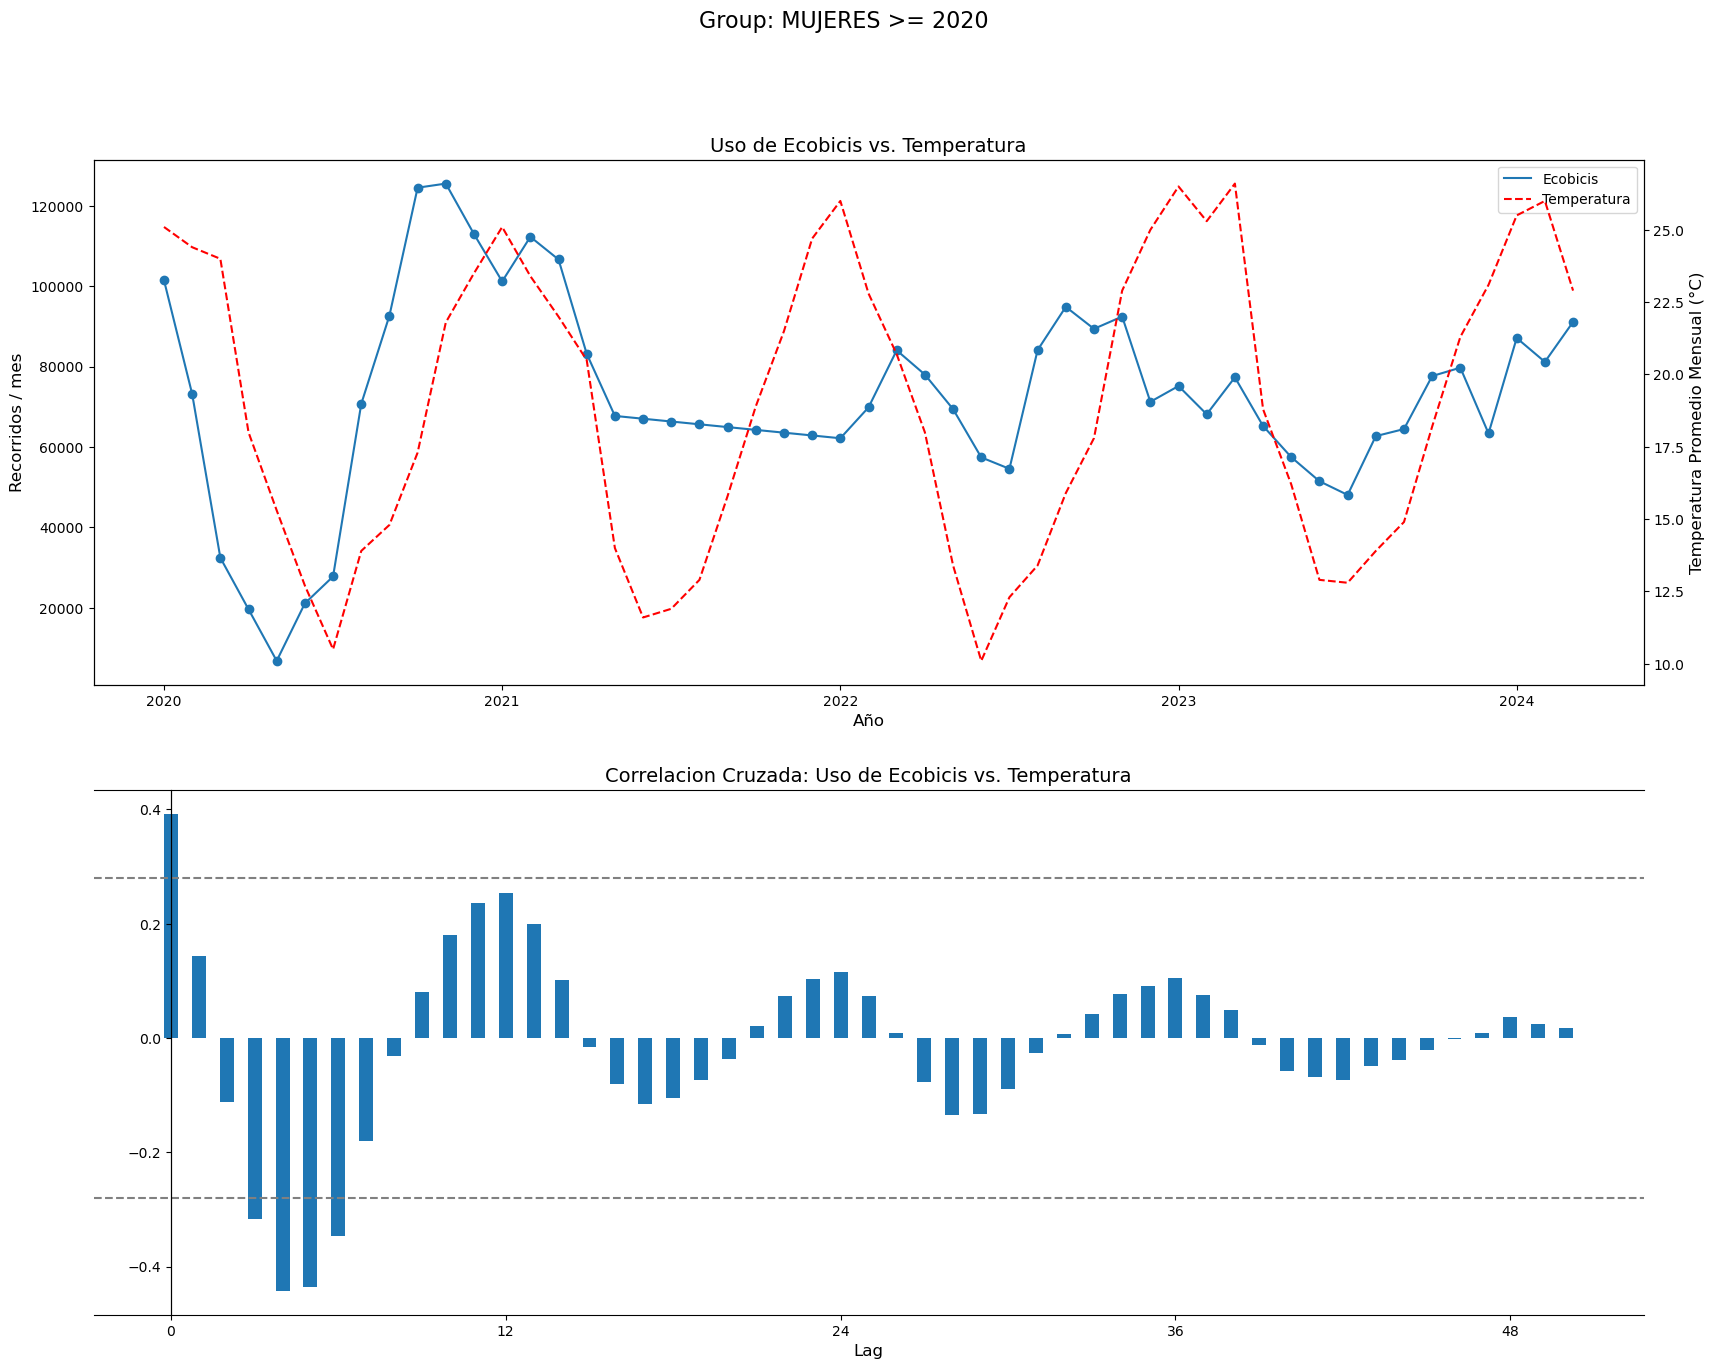

Coeficiente de Correlacion de Pearson: 0.39280376003615286


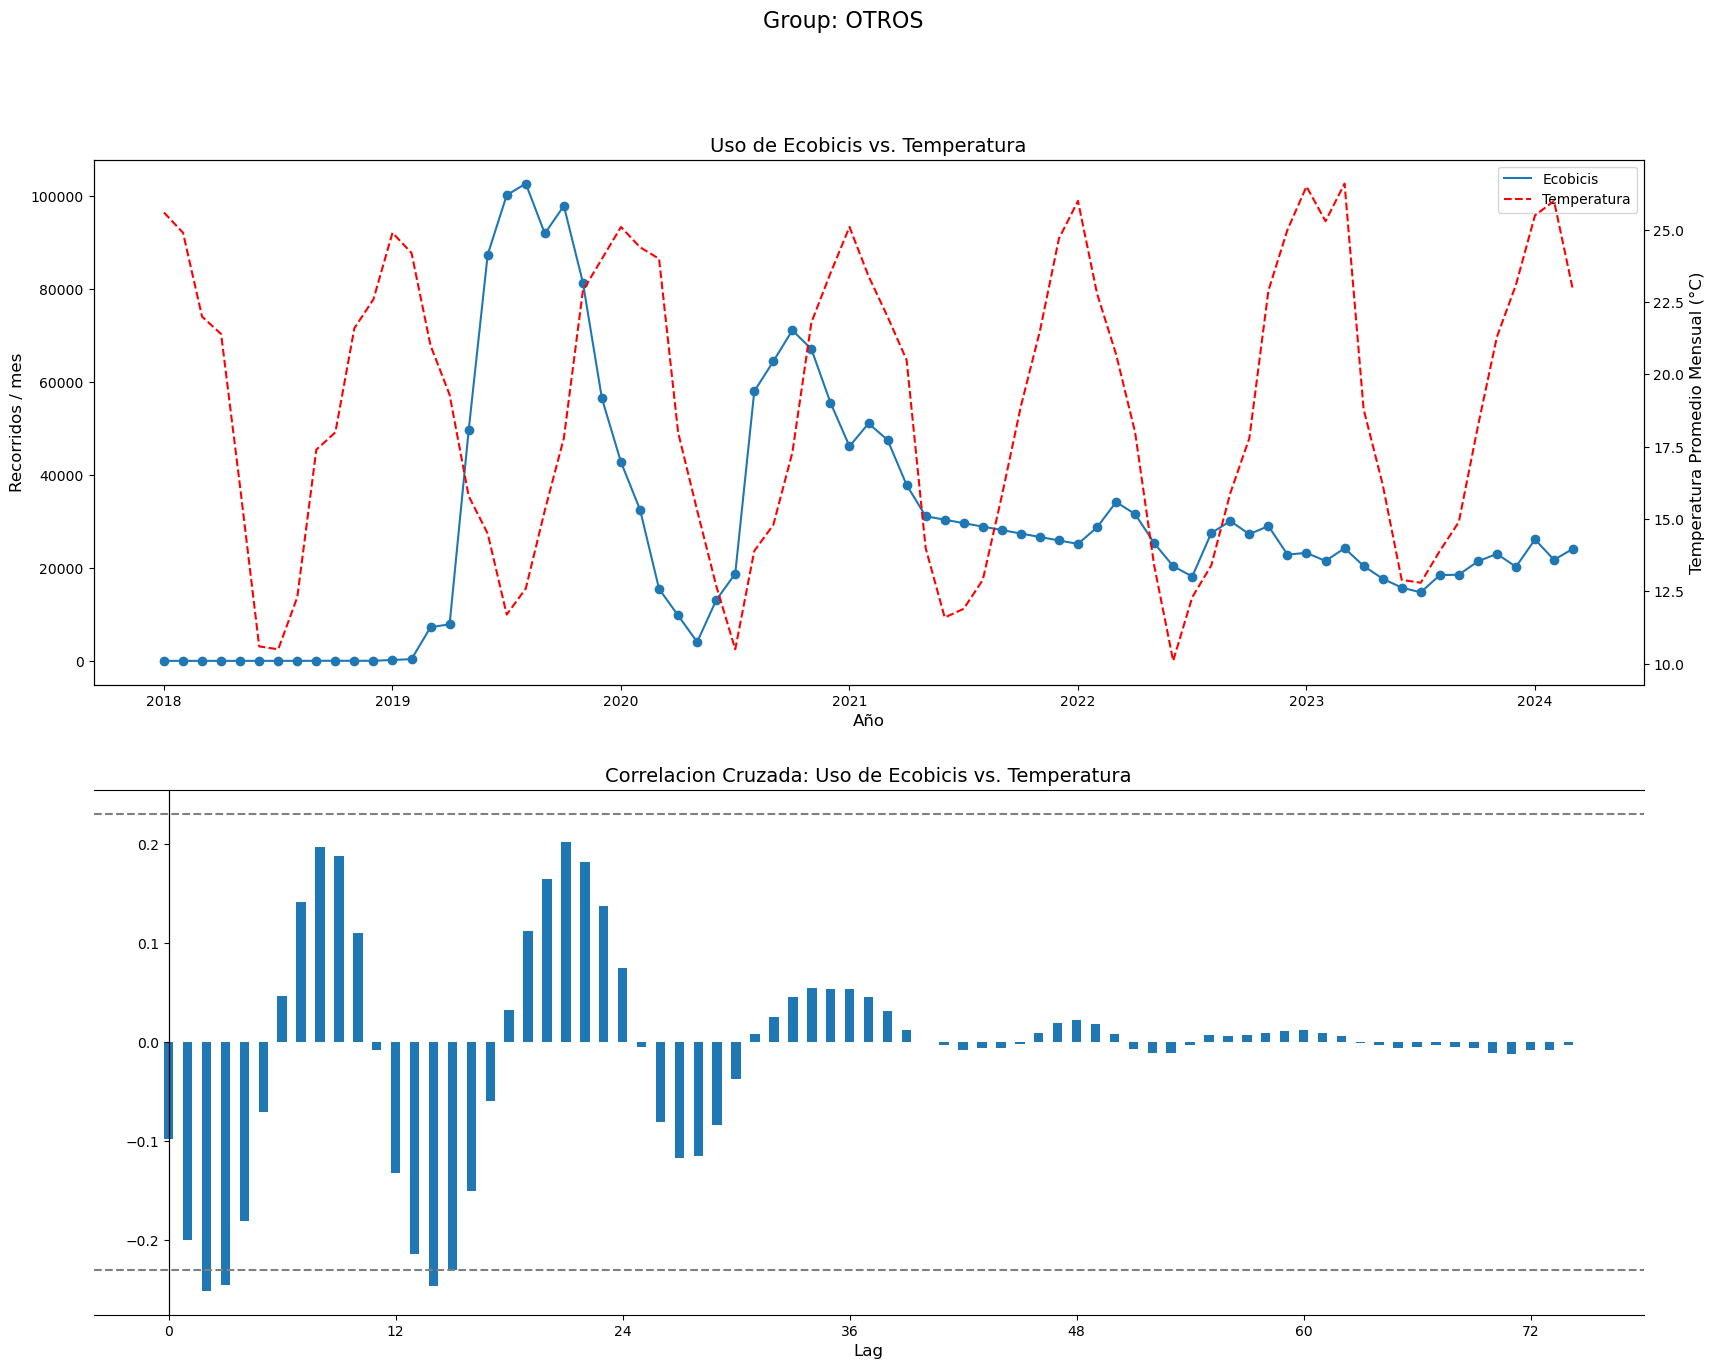

Coeficiente de Correlacion de Pearson: -0.09785481512572125


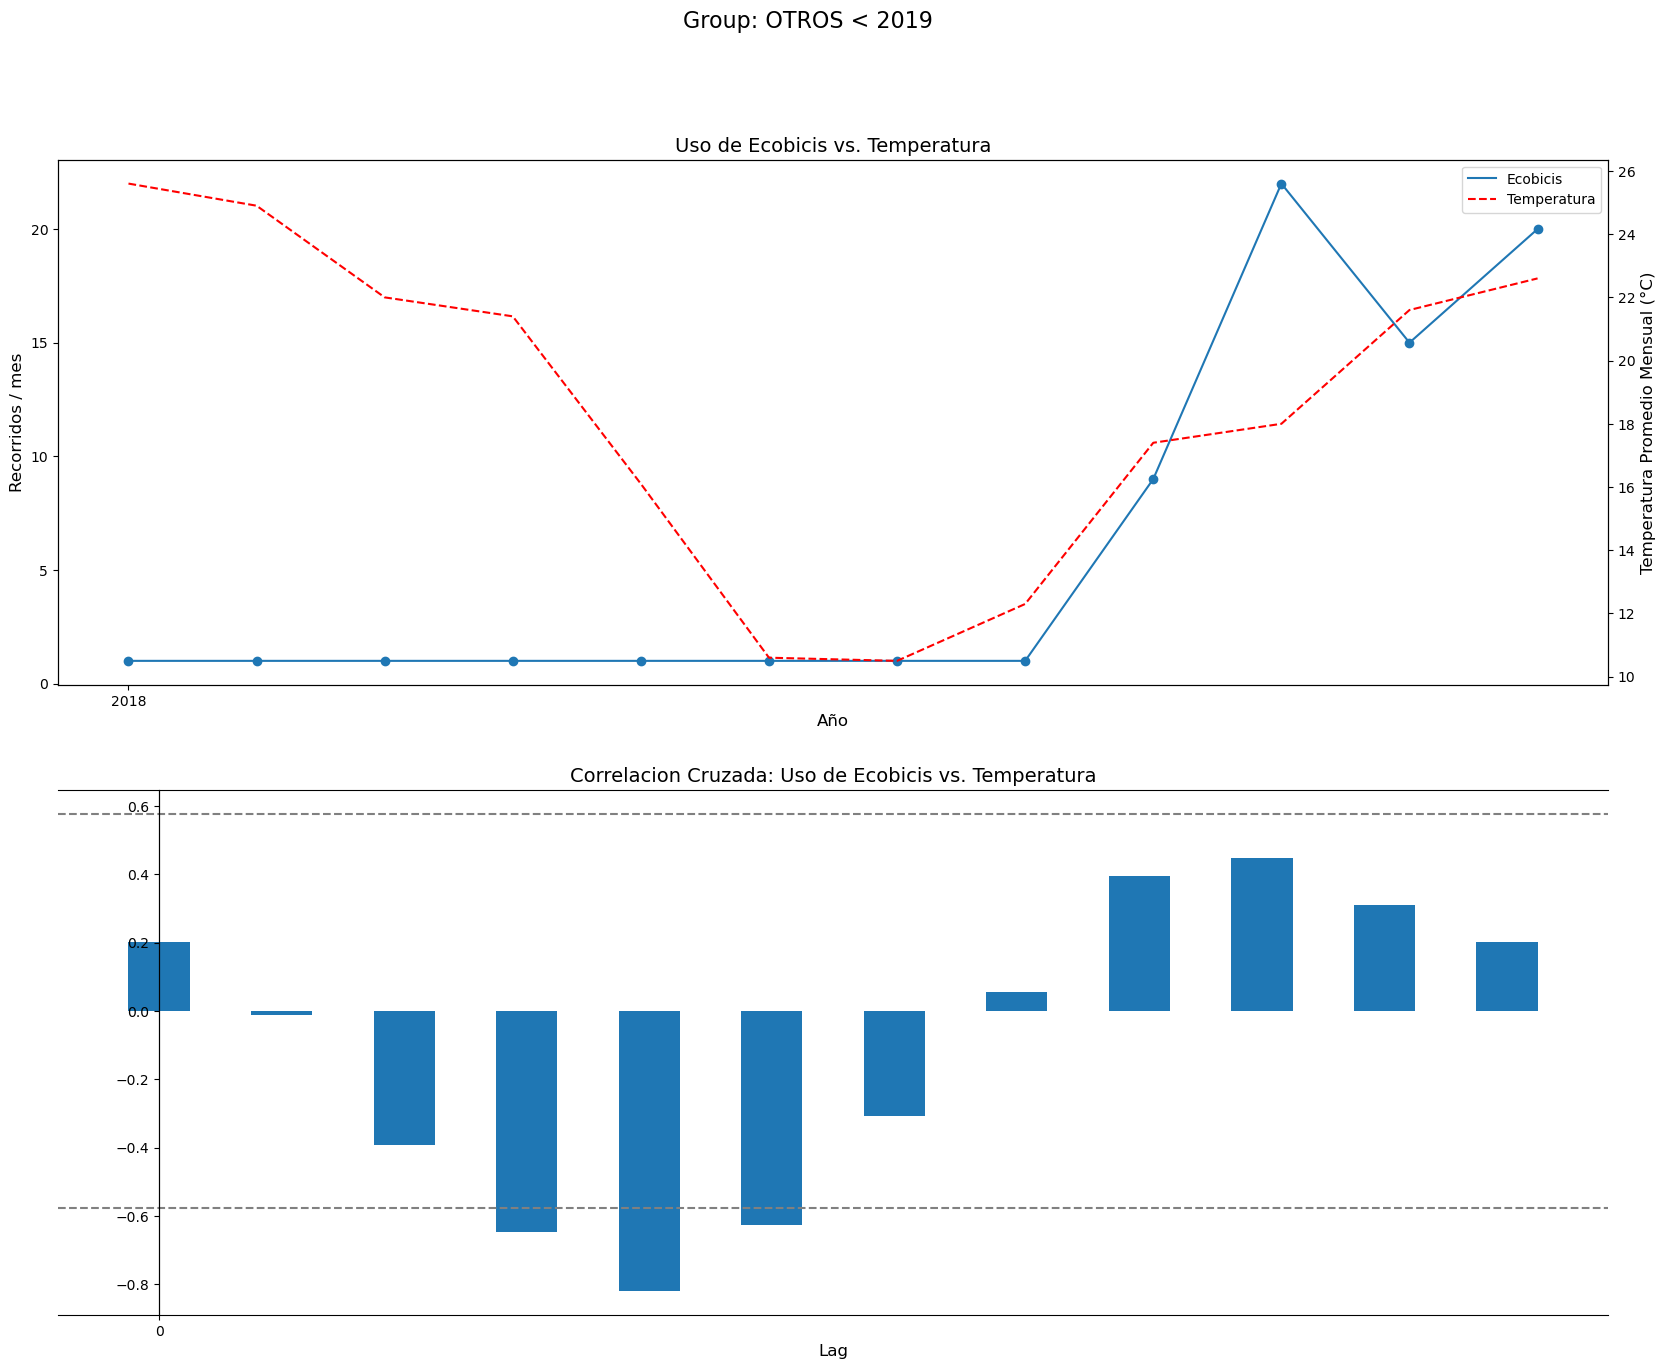

Coeficiente de Correlacion de Pearson: 0.20180596357681732


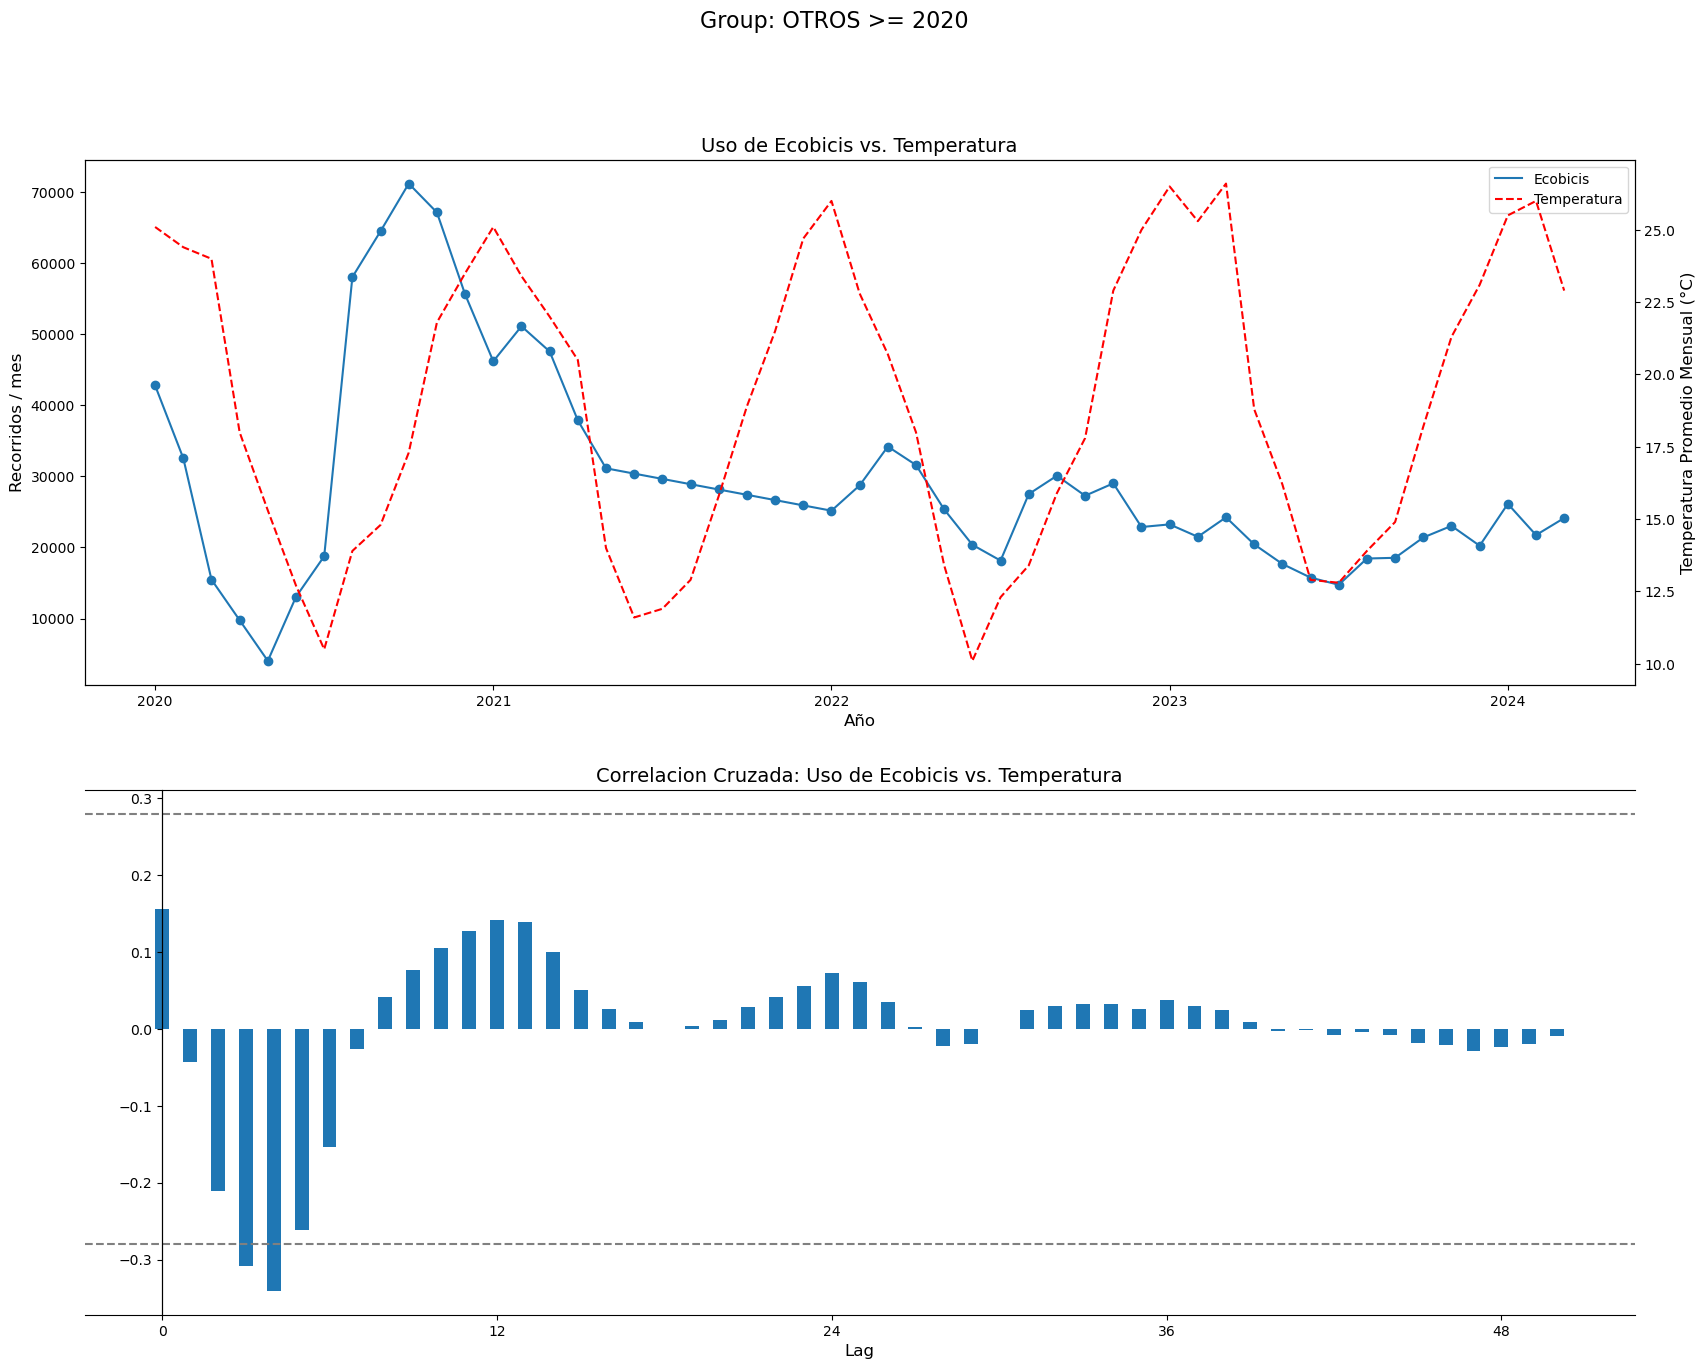

Coeficiente de Correlacion de Pearson: 0.15656264141508386
Grupos que muestran una correlacion considerable (> 0.3): ['TODOS >= 2020', 'HOMBRES >= 2020', 'MUJERES >= 2020']


In [8]:
all_data = merge_recorridos_temperaturas(recorridos_data, temperaturas)
male_data = merge_recorridos_temperaturas(
    recorridos_data[recorridos_data["GENERO"] == "MASCULINO"], temperaturas
)
female_data = merge_recorridos_temperaturas(
    recorridos_data[recorridos_data["GENERO"] == "FEMENINO"], temperaturas
)
other_data = merge_recorridos_temperaturas(
    recorridos_data[recorridos_data["GENERO"] == "OTRO"], temperaturas
)

test_groups = {
    "TODOS": all_data,
    "TODOS < 2019": all_data[all_data["ANIO"] < 2019],
    "TODOS >= 2020": all_data[all_data["ANIO"] >= 2020],
    "HOMBRES": male_data,
    "HOMBRES < 2019": male_data[male_data["ANIO"] < 2019],
    "HOMBRES >= 2020": male_data[male_data["ANIO"] >= 2020],
    "MUJERES": female_data,
    "MUJERES < 2019": female_data[female_data["ANIO"] < 2019],
    "MUJERES >= 2020": female_data[female_data["ANIO"] >= 2020],
    "OTROS": other_data,
    "OTROS < 2019": other_data[other_data["ANIO"] < 2019],
    "OTROS >= 2020": other_data[other_data["ANIO"] >= 2020],
}

best_groups = []
for name, group_data in test_groups.items():
    group_data.reset_index(inplace=True, drop=True)

    xticks_data = group_data[group_data["MES_NUM"] == 1]
    xticklabels = pd.Series(xticks_data["ANIO"])
    xticks = pd.Series(xticks_data.index.get_level_values(0))

    correlation = correlation_analysis(
        pd.Series(group_data["RECORRIDOS"]),
        pd.Series(group_data["TEMP"]),
        title="Uso de Ecobicis vs. Temperatura",
        ts_xlabel="Año",
        ts_ylabel1="Recorridos / mes",
        ts_ylabel2="Temperatura Promedio Mensual (°C)",
        ts_xticks=xticks,
        ts_xticklabels=xticklabels,
        corr_xticks=xticks,
        corr_xticklabels=None,
        ts_plot_opts1={"label": "Ecobicis"},
        ts_plot_opts2={"label": "Temperatura", "color": "red", "linestyle": "--"},
        corr_plot_opts={},
        suptitle=f"Group: {name}",
    )

    if abs(correlation) > 0.3:
        best_groups.append(name)


print("Grupos que muestran una correlacion considerable (> 0.3):", best_groups)

### Usando Media Móvil de 3 Meses

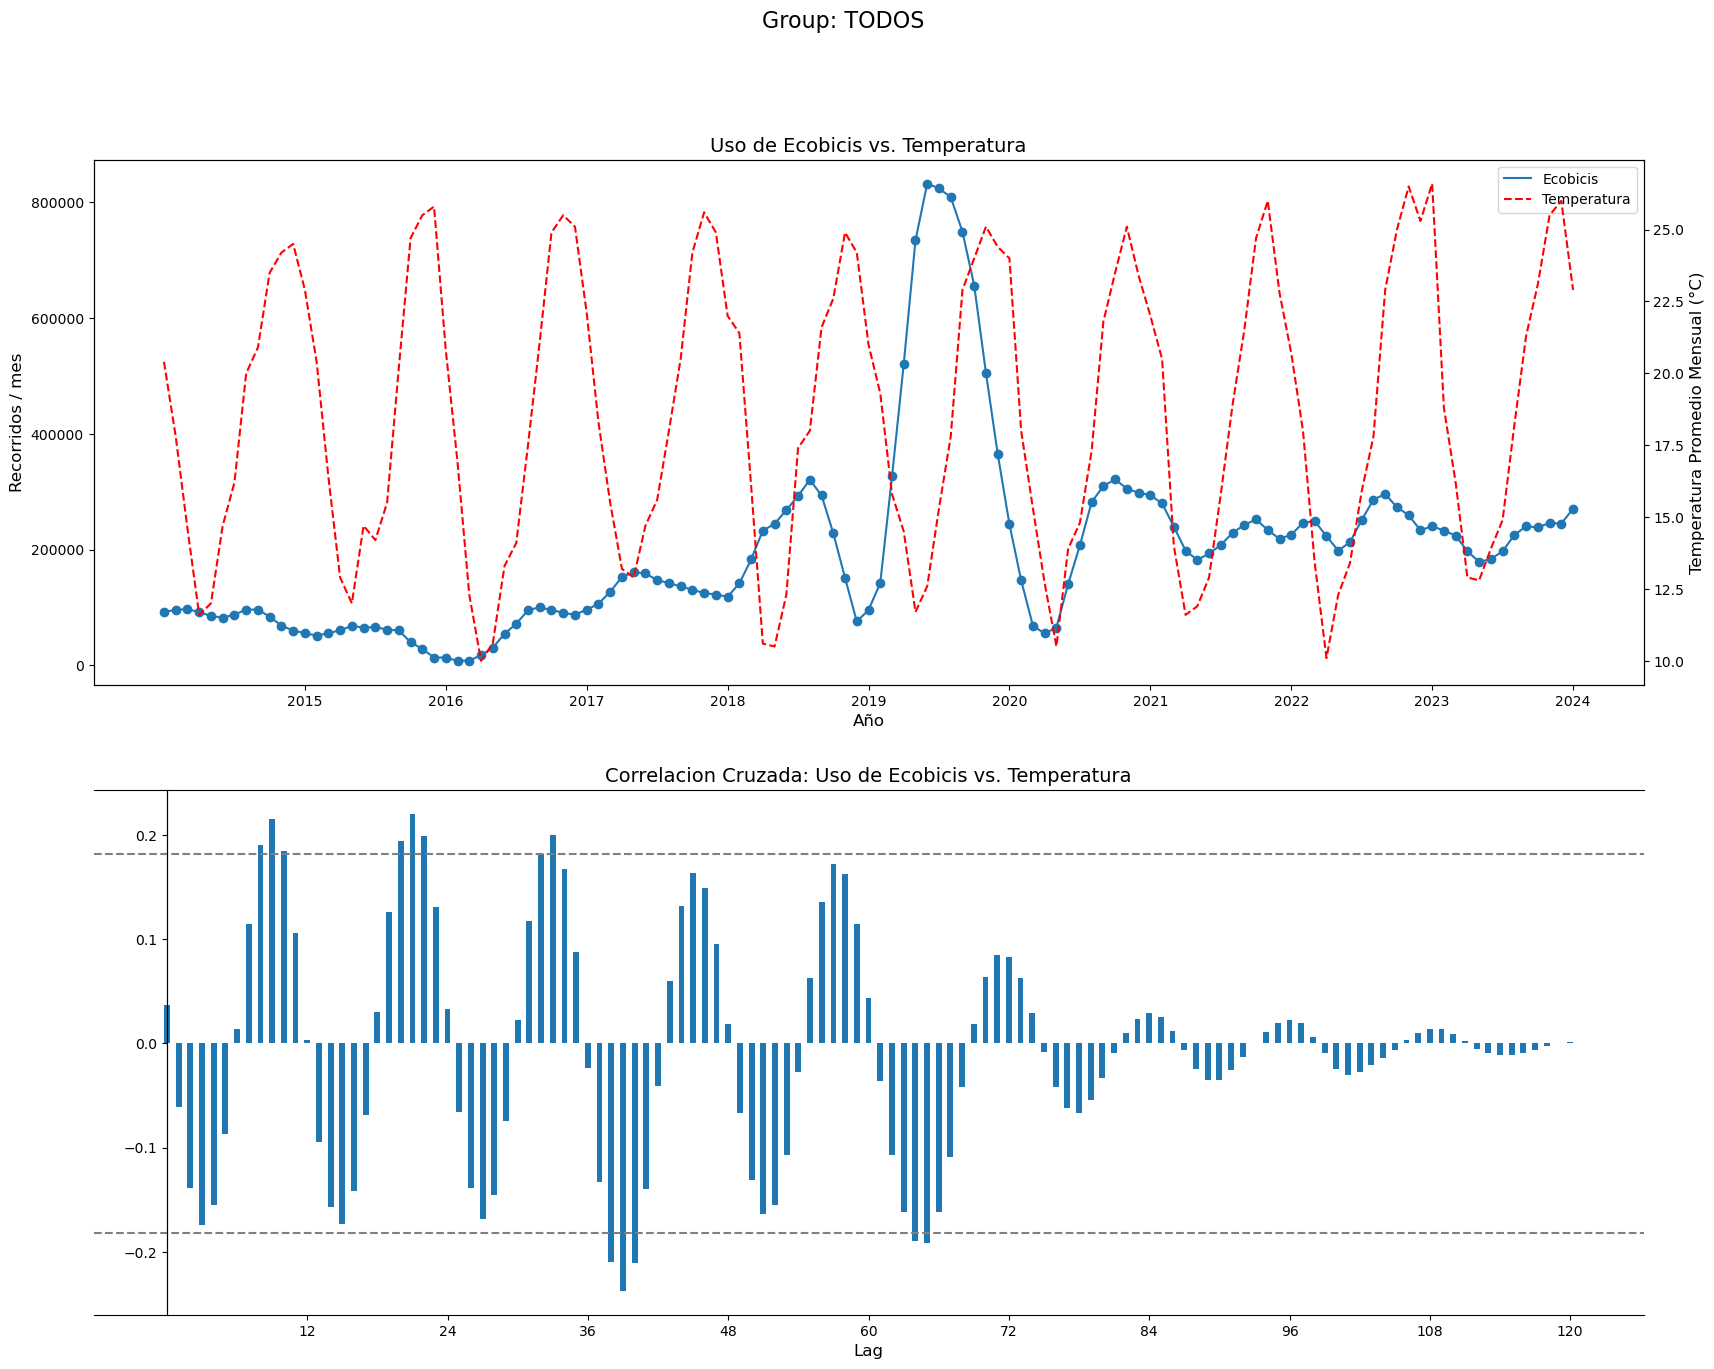

Coeficiente de Correlacion de Pearson: 0.036450716963958366


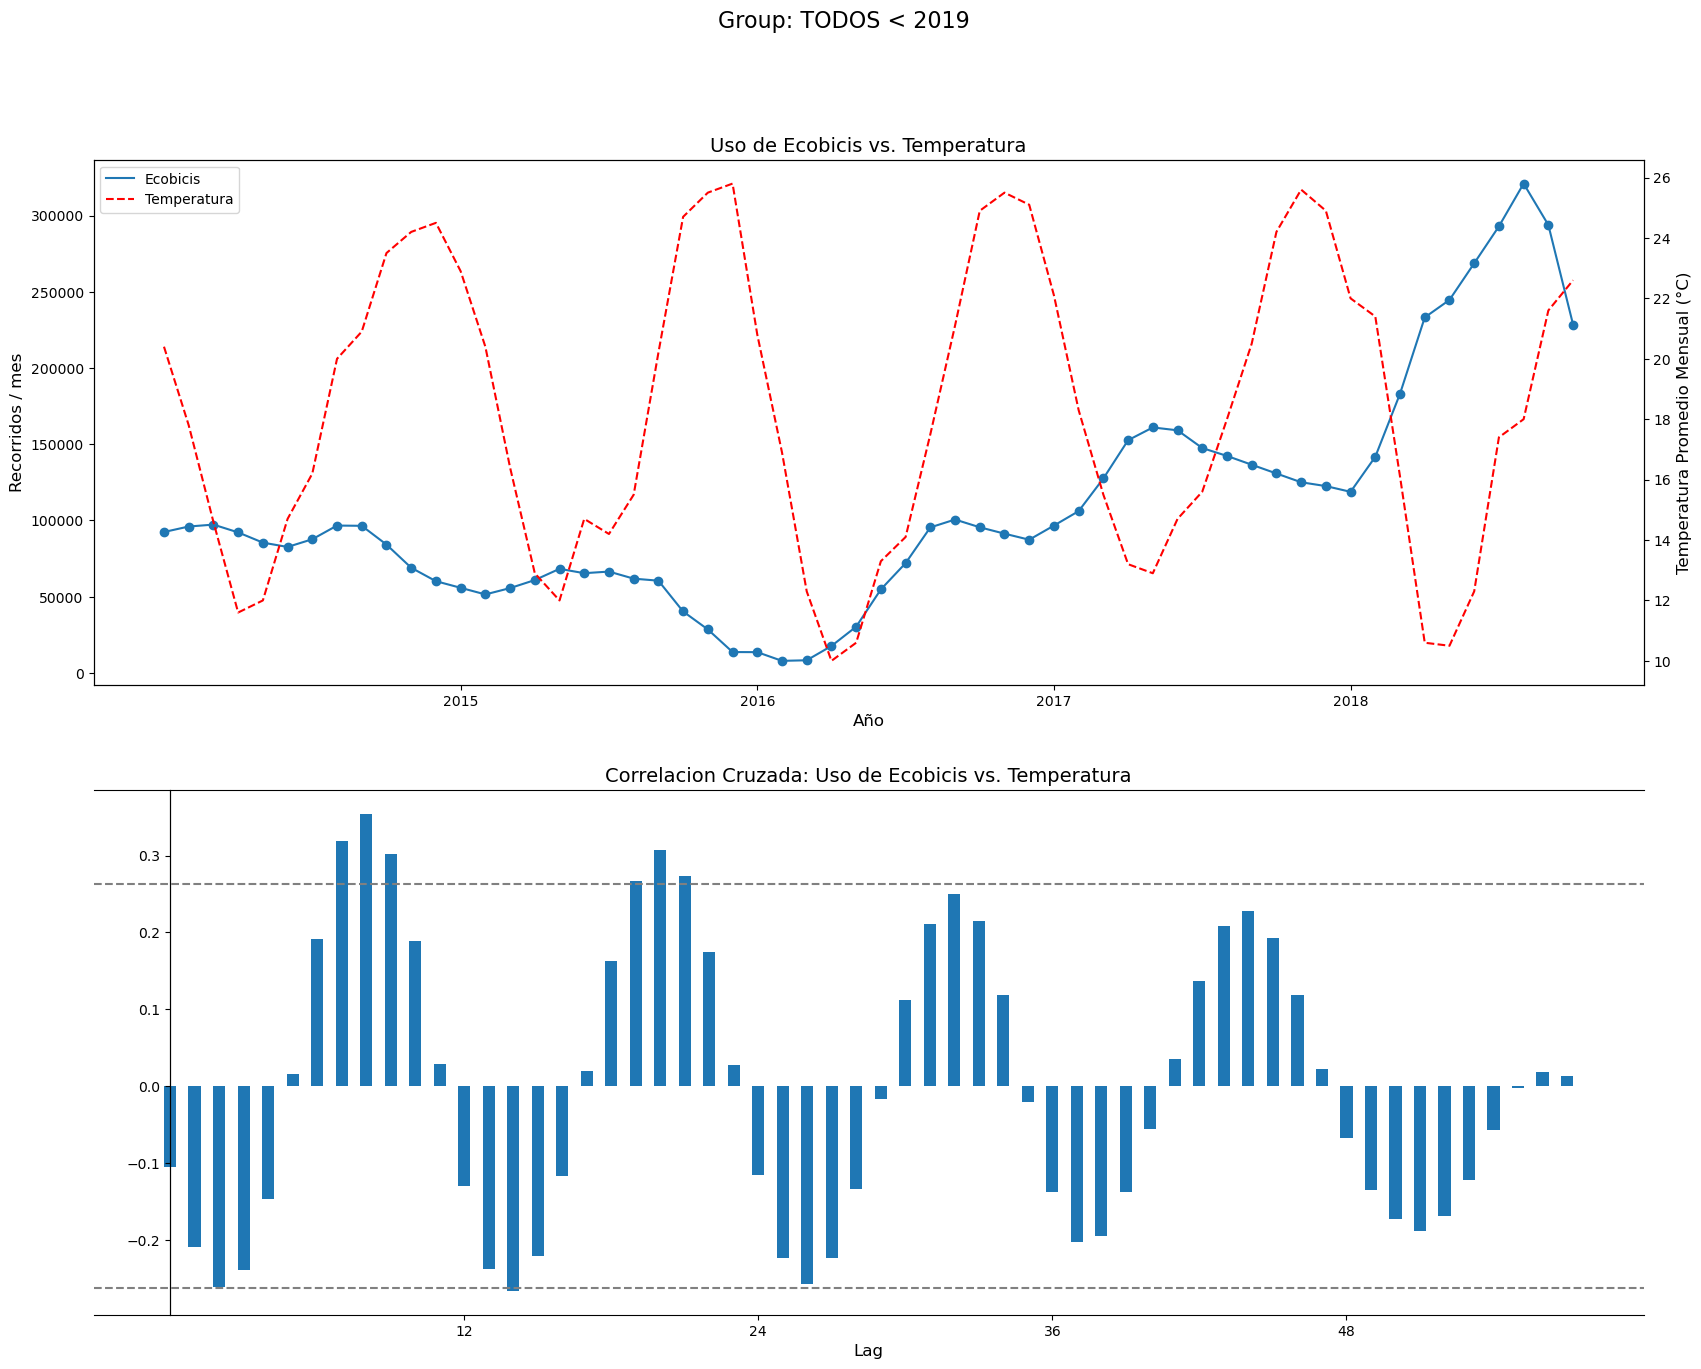

Coeficiente de Correlacion de Pearson: -0.10456114407166366


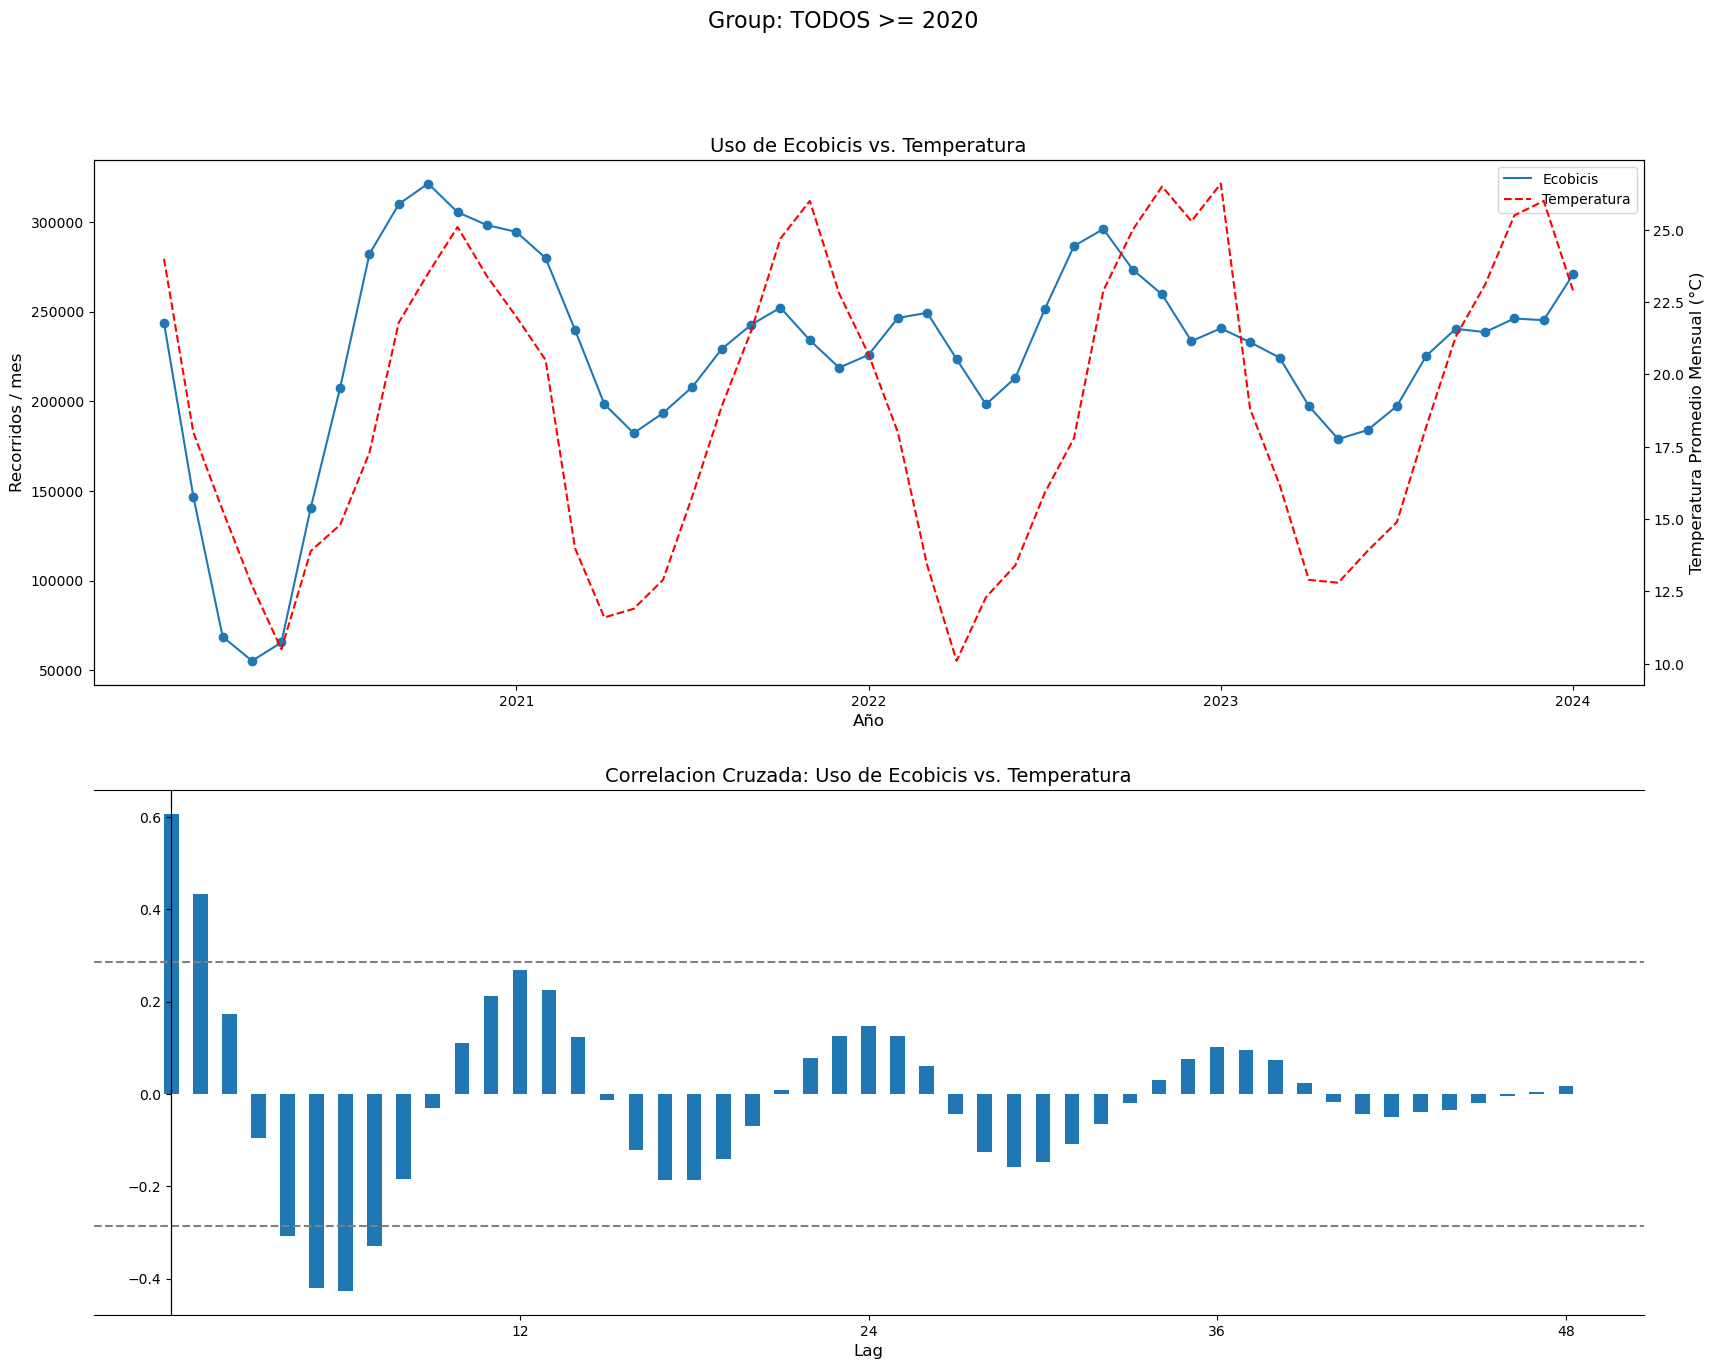

Coeficiente de Correlacion de Pearson: 0.6074785850534133


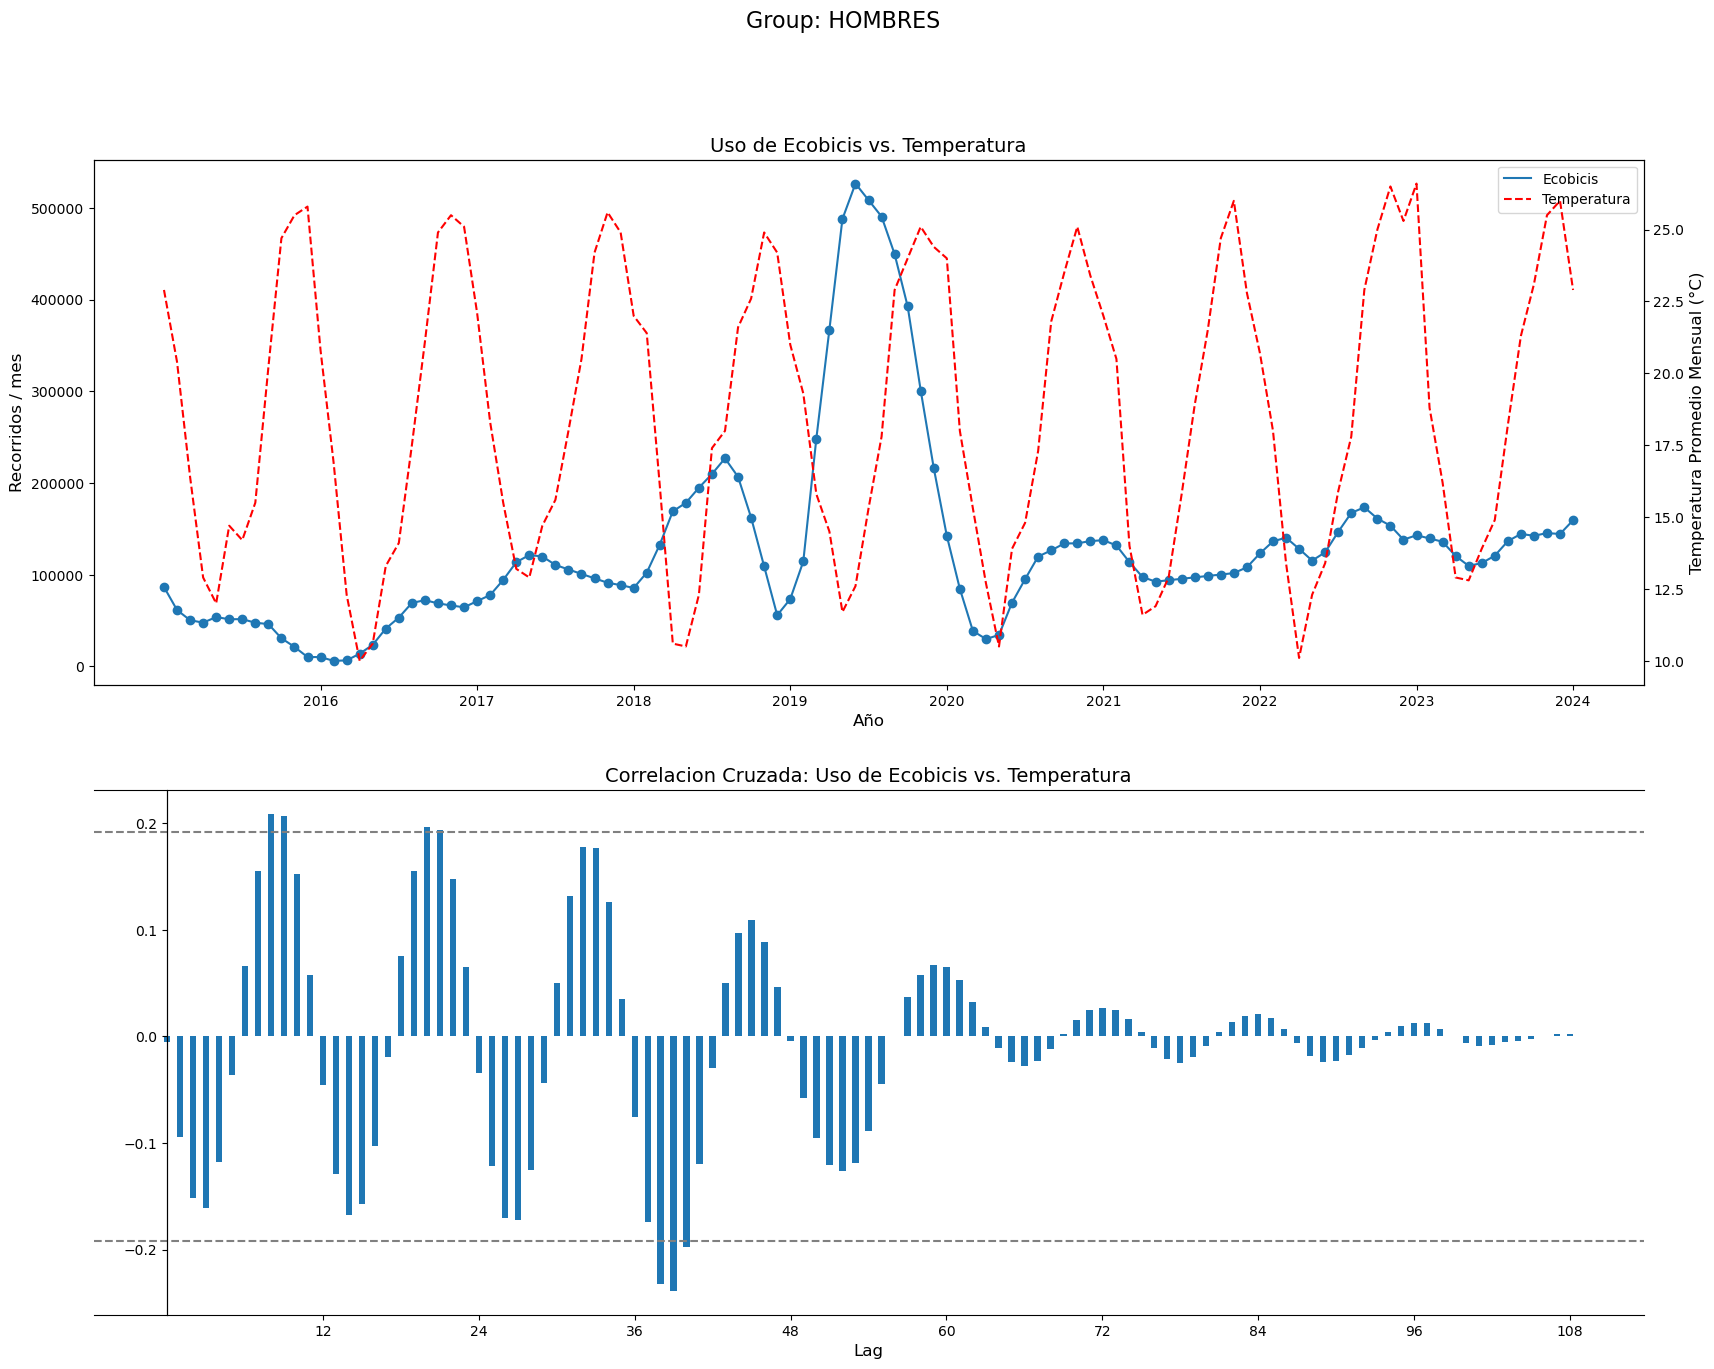

Coeficiente de Correlacion de Pearson: -0.005235585922302687


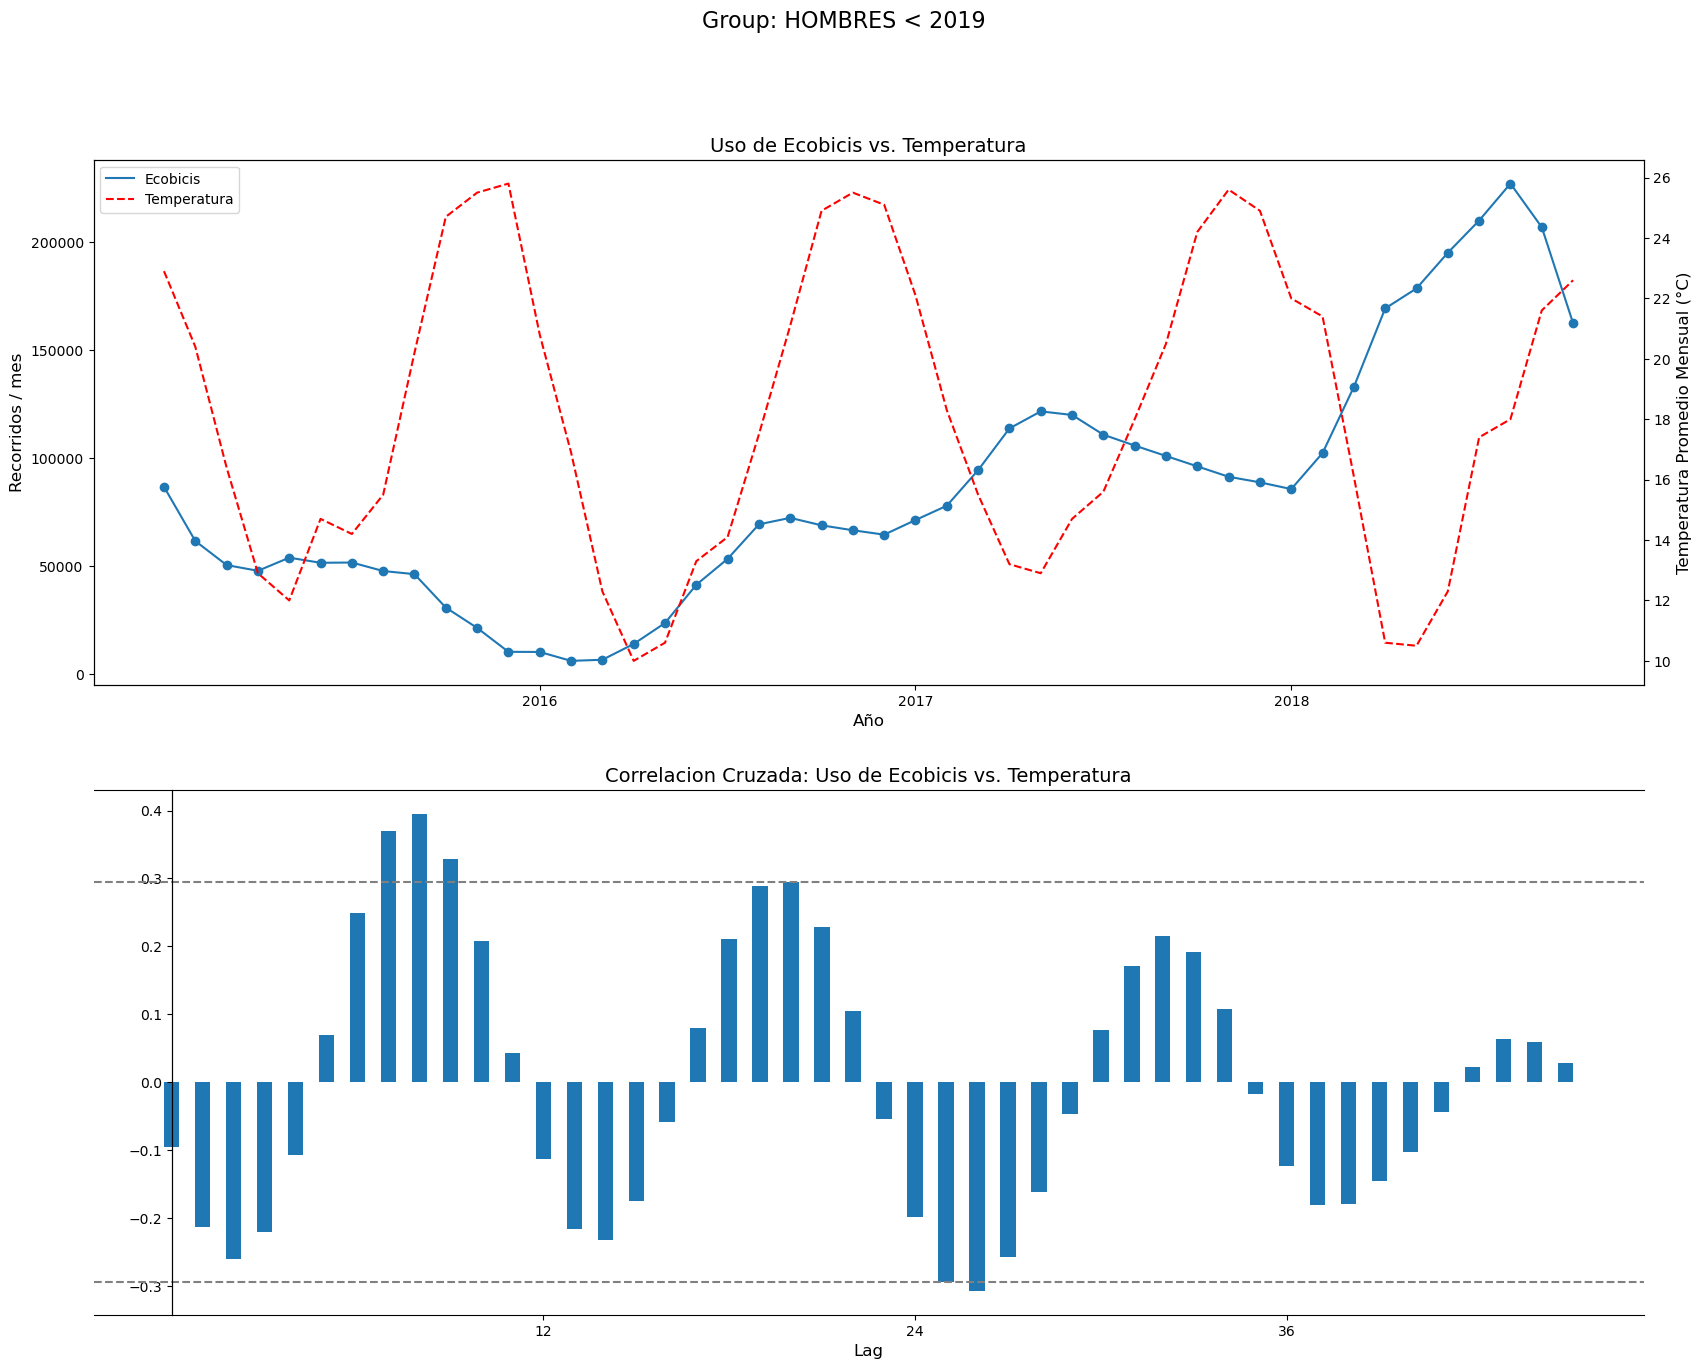

Coeficiente de Correlacion de Pearson: -0.09552456079485608


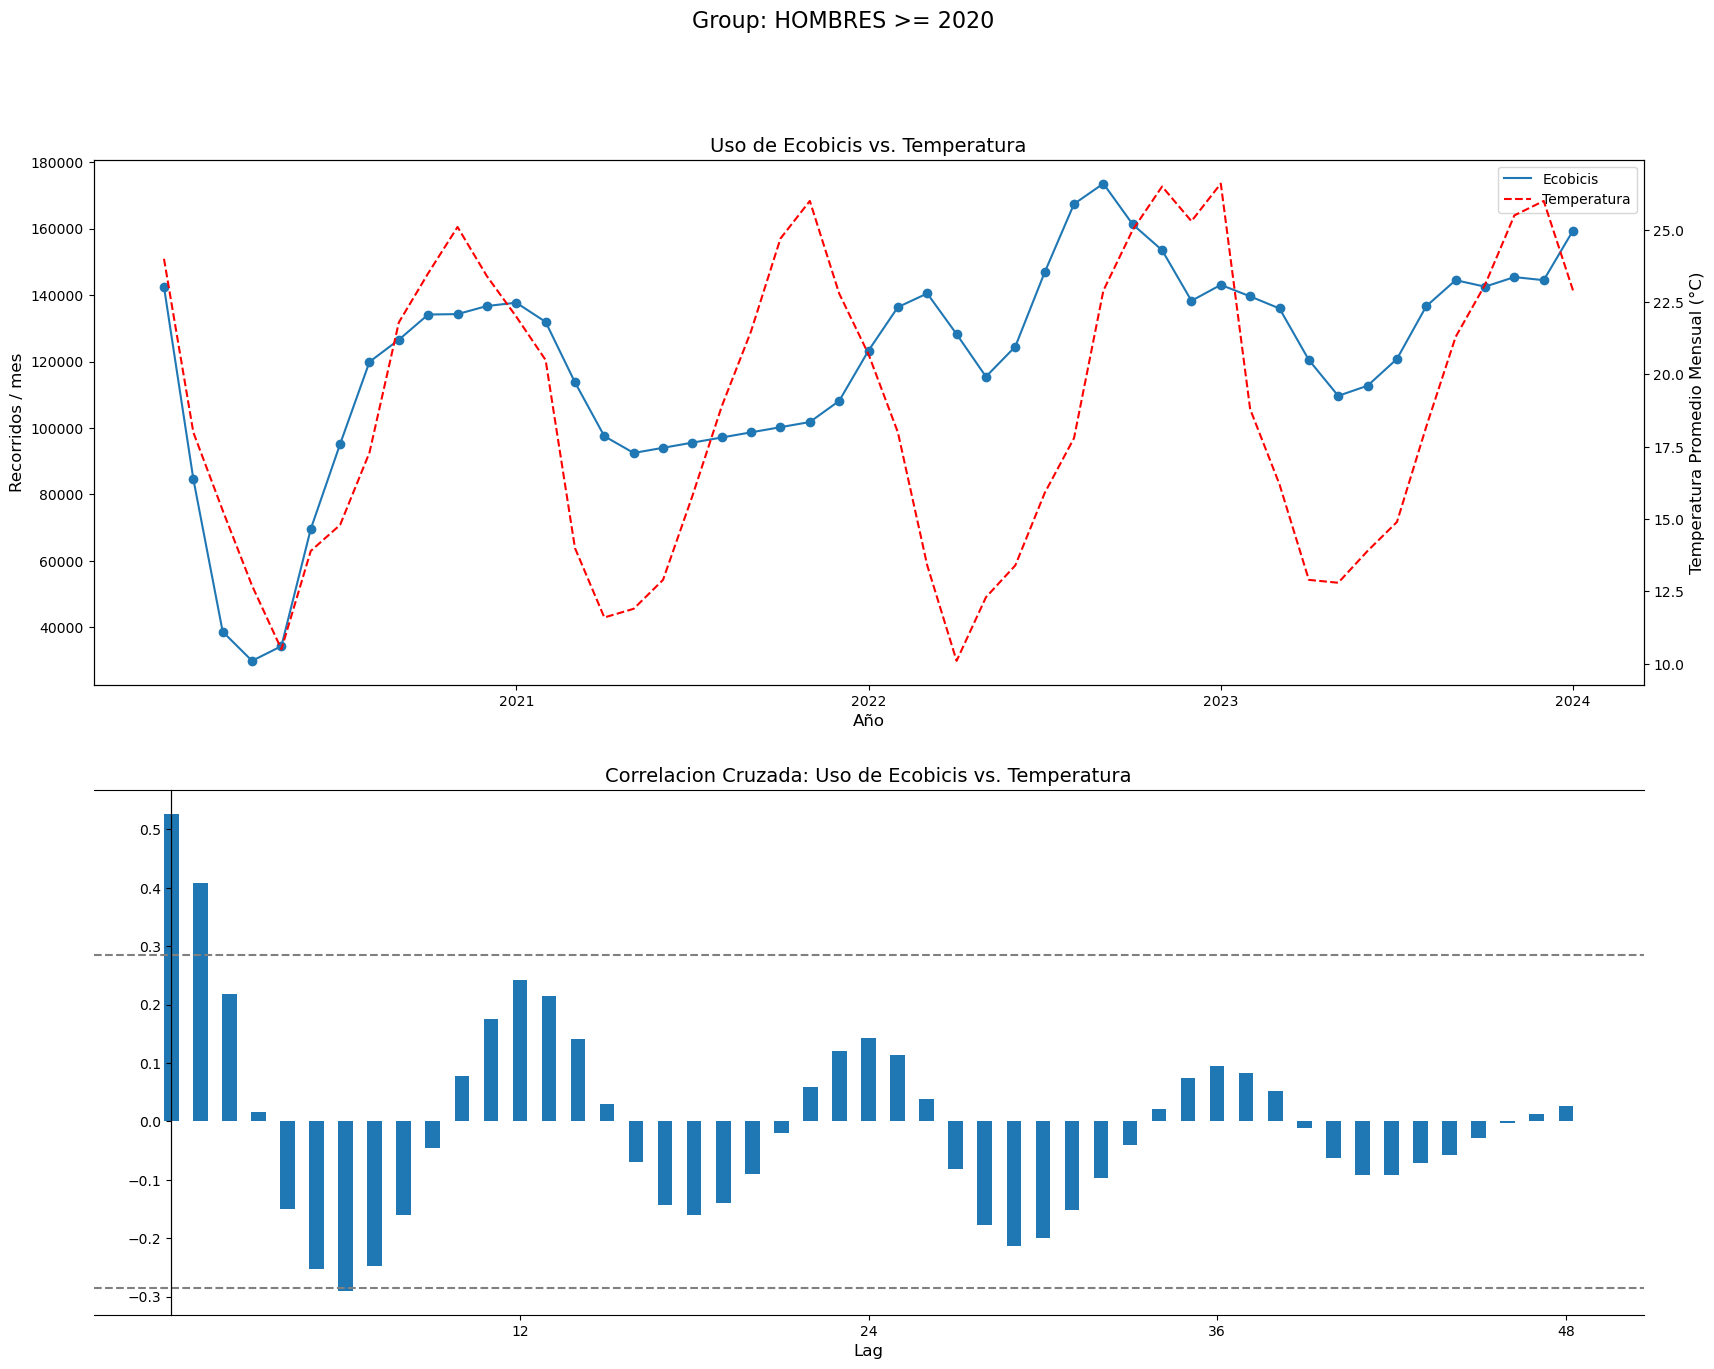

Coeficiente de Correlacion de Pearson: 0.5271319295883238


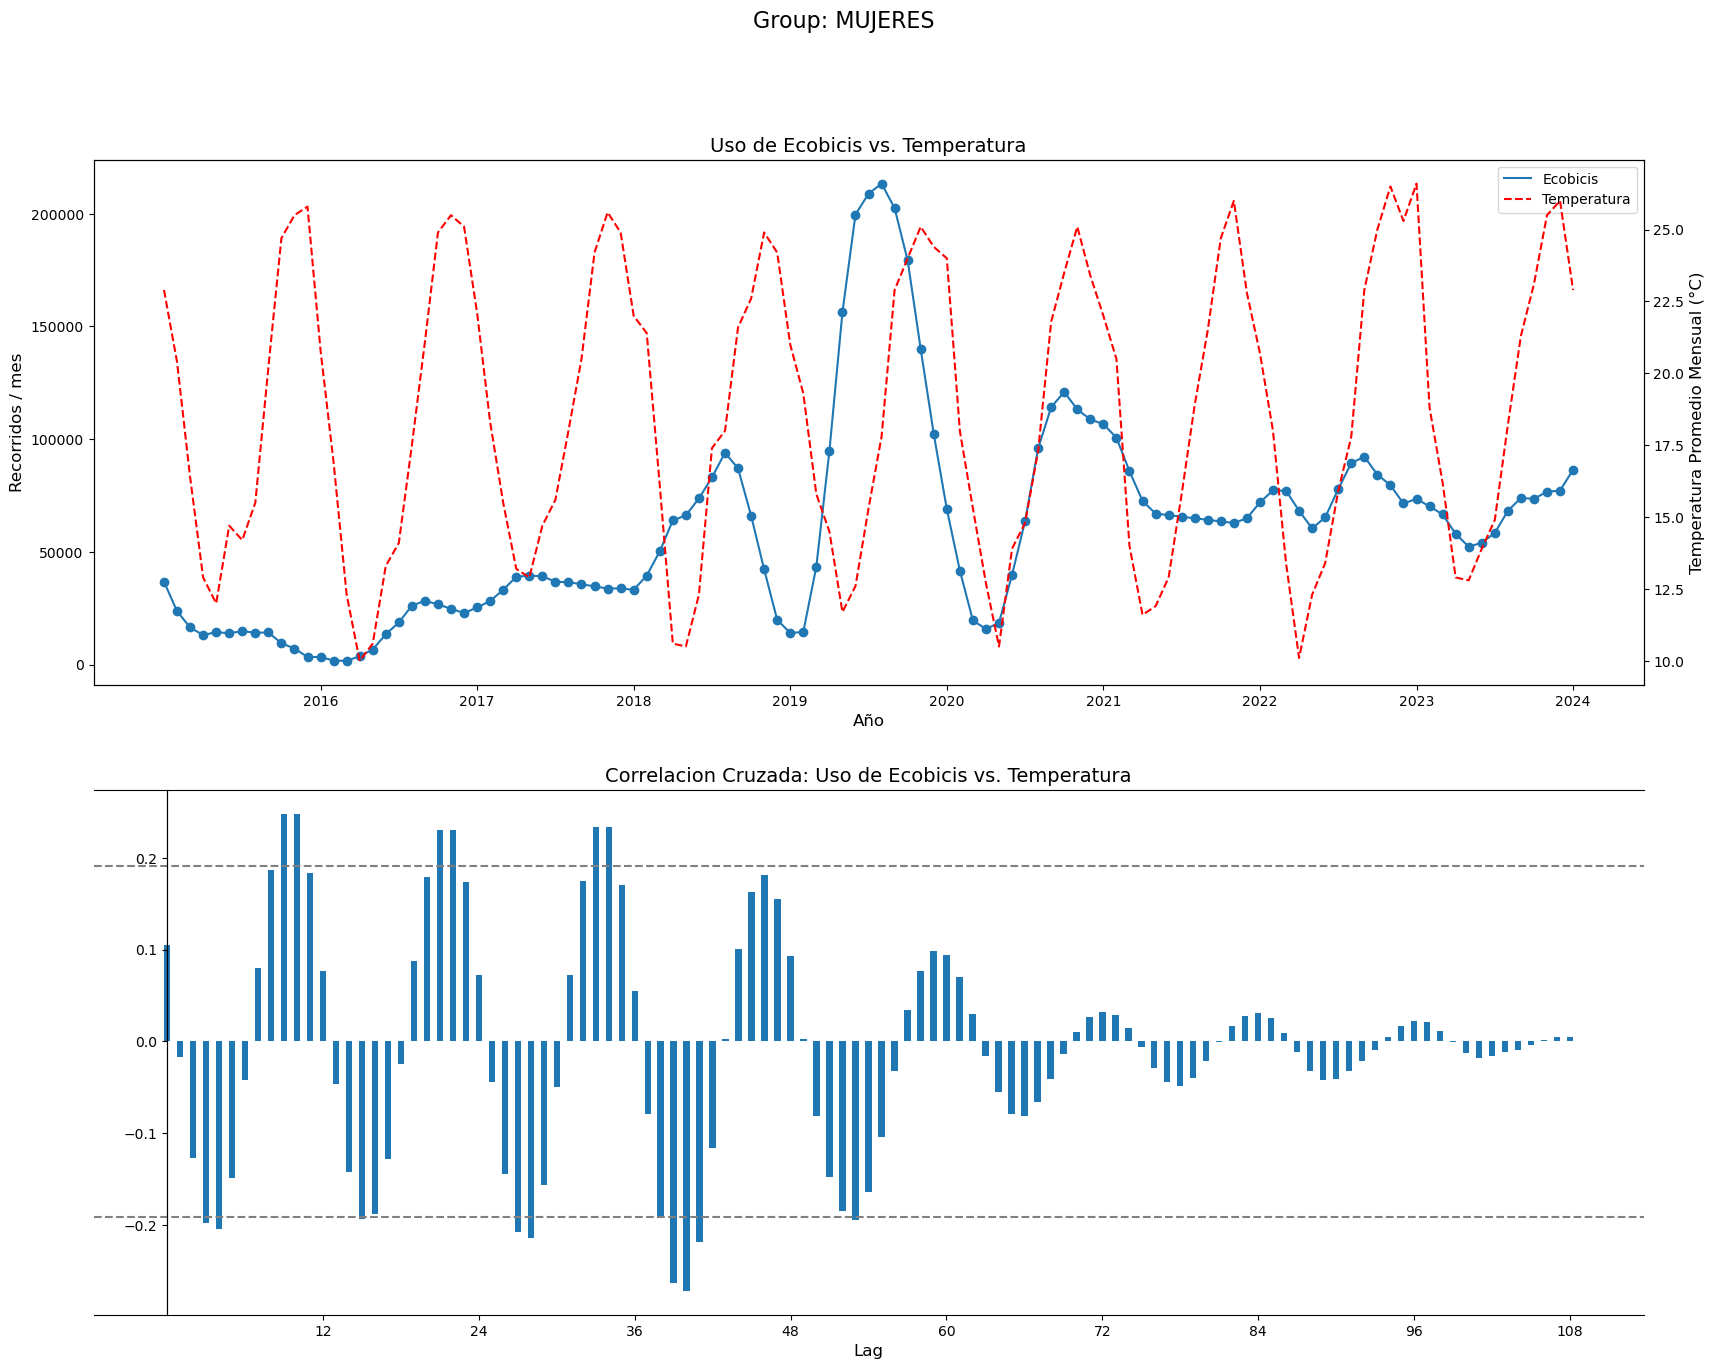

Coeficiente de Correlacion de Pearson: 0.1053932718864849


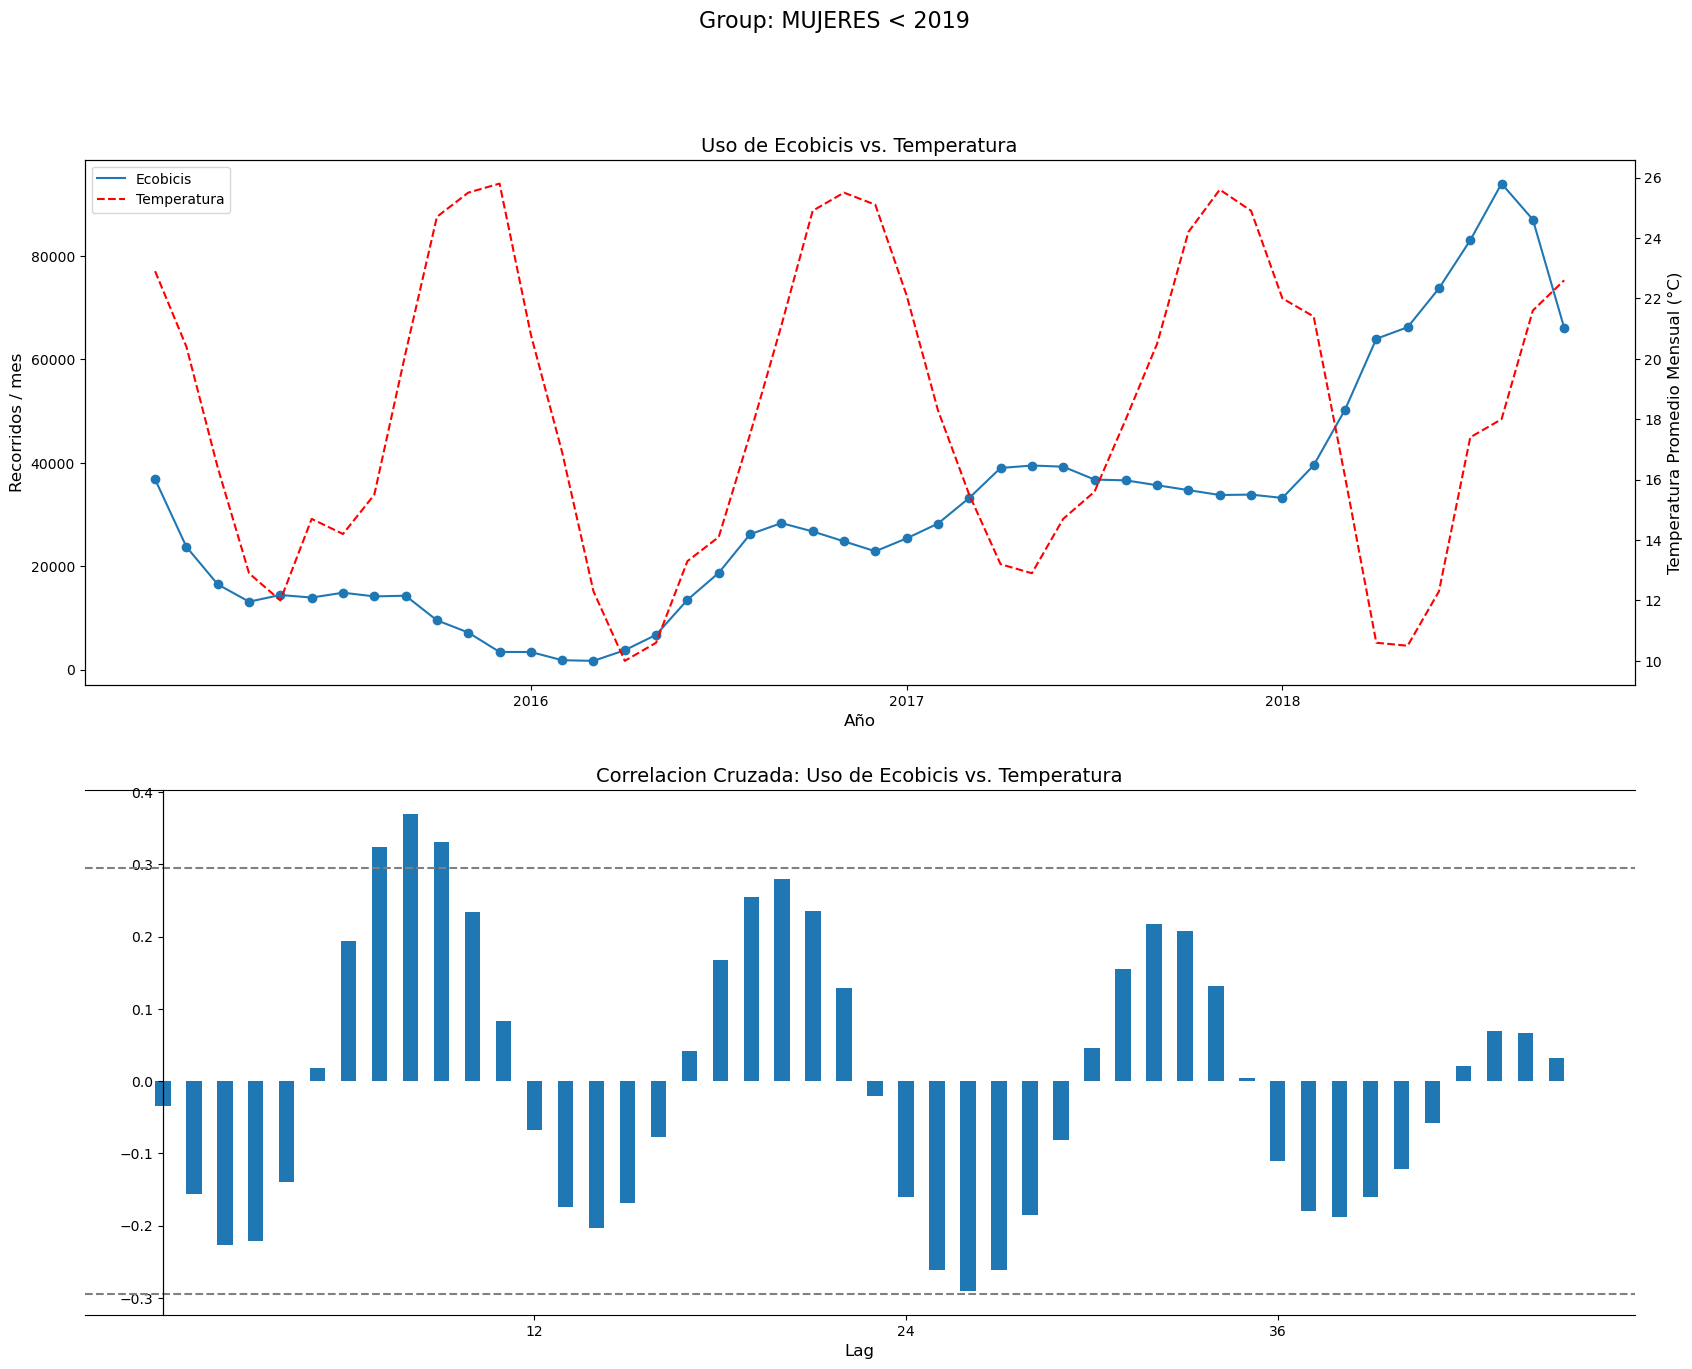

Coeficiente de Correlacion de Pearson: -0.034157413725466296


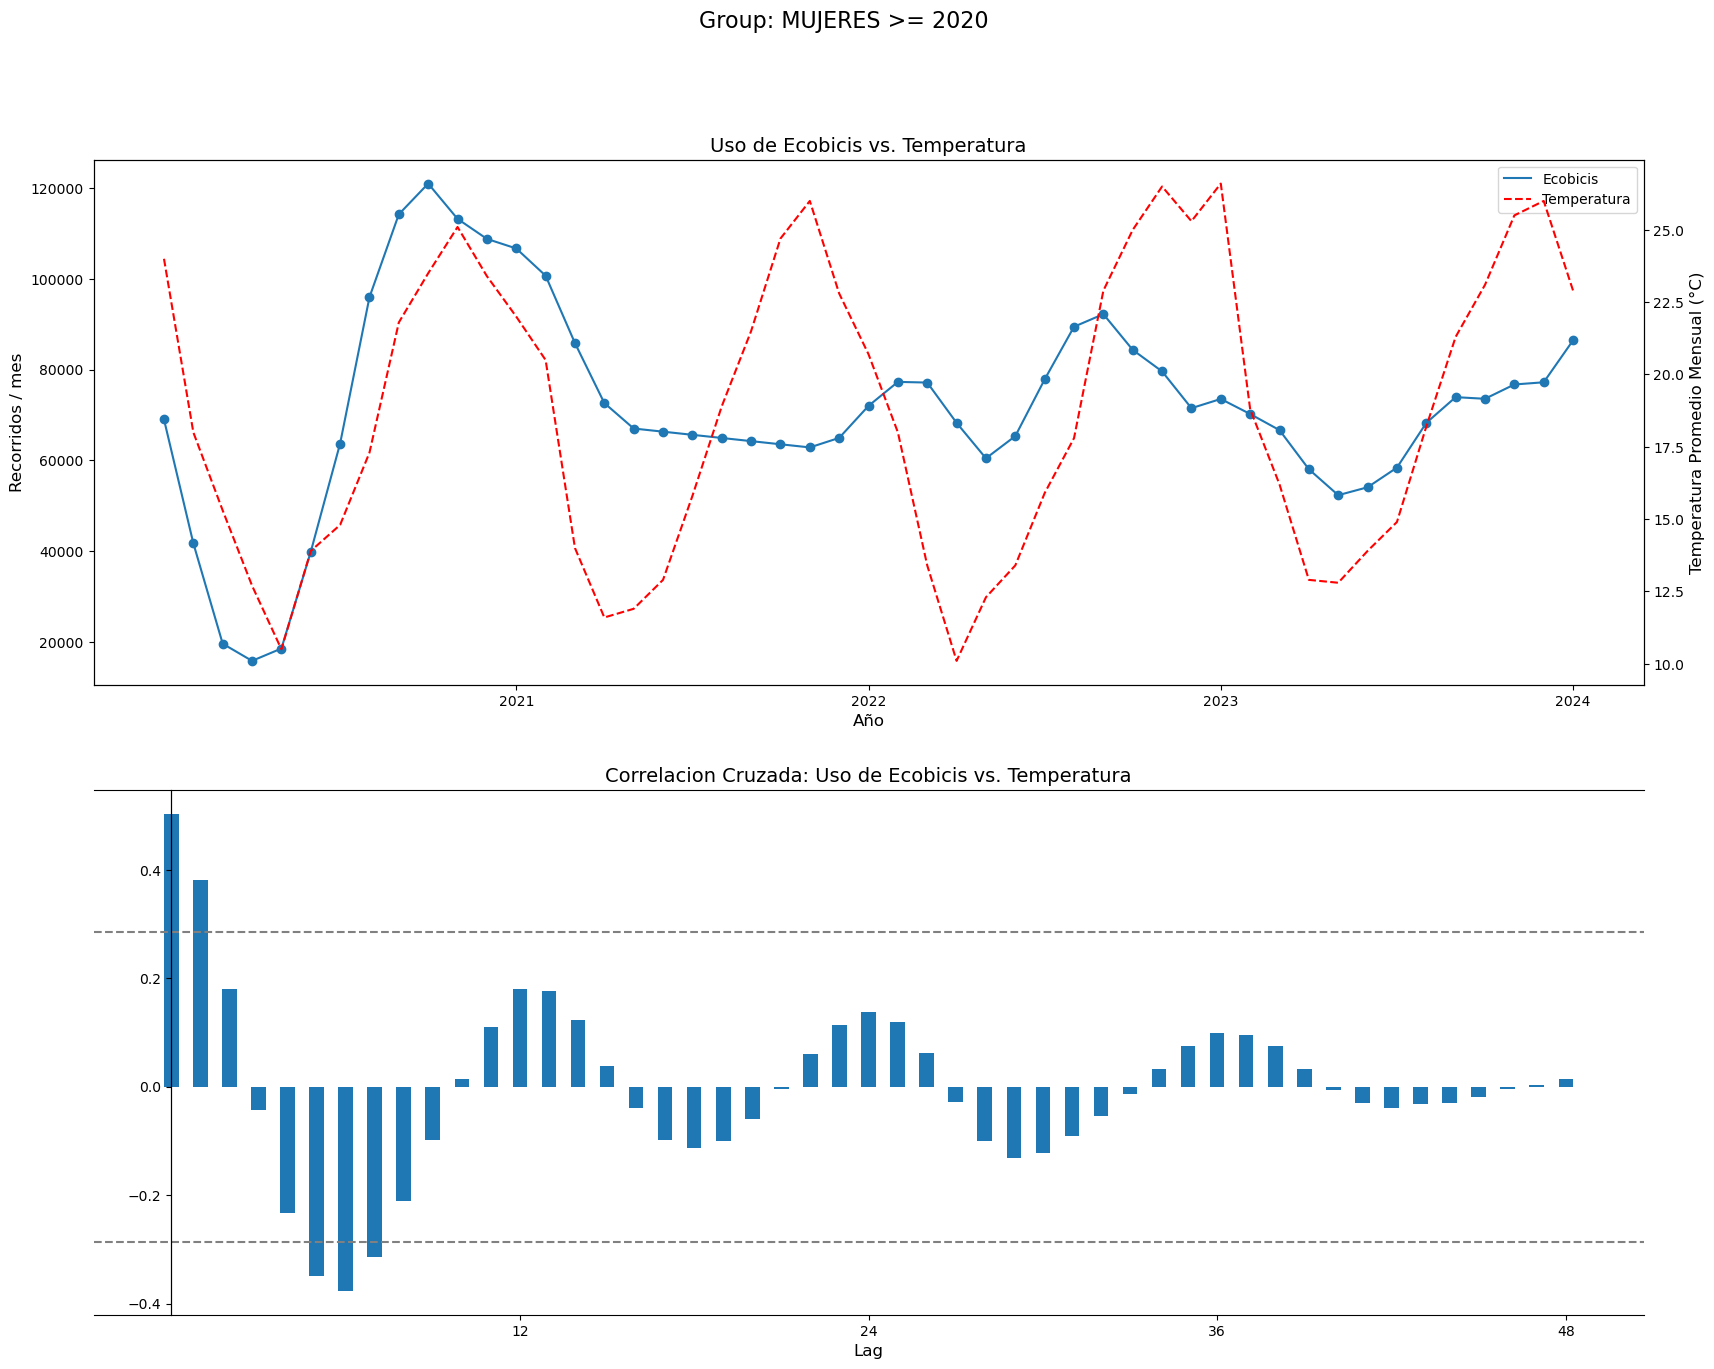

Coeficiente de Correlacion de Pearson: 0.5036580554093439


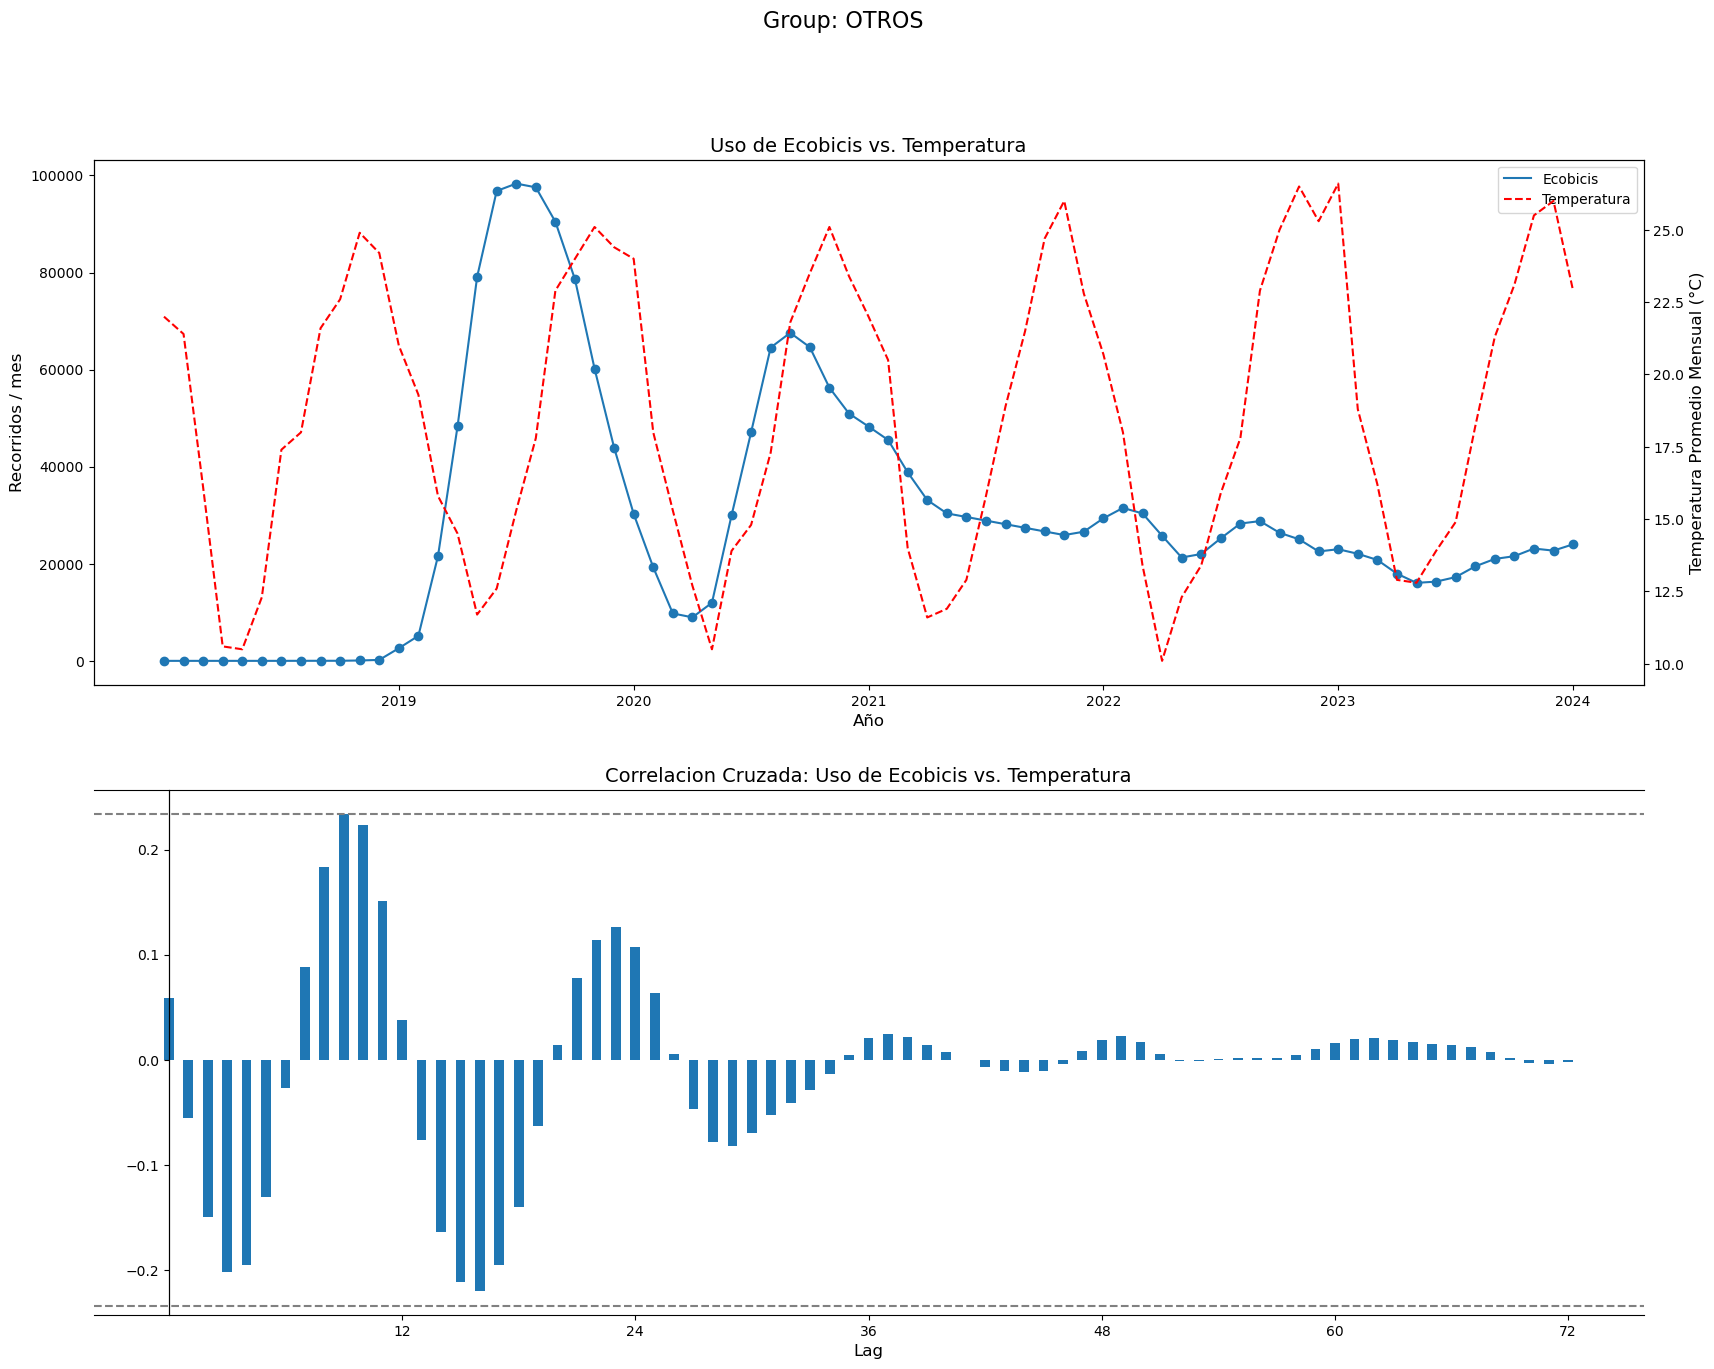

Coeficiente de Correlacion de Pearson: 0.05832409668731893


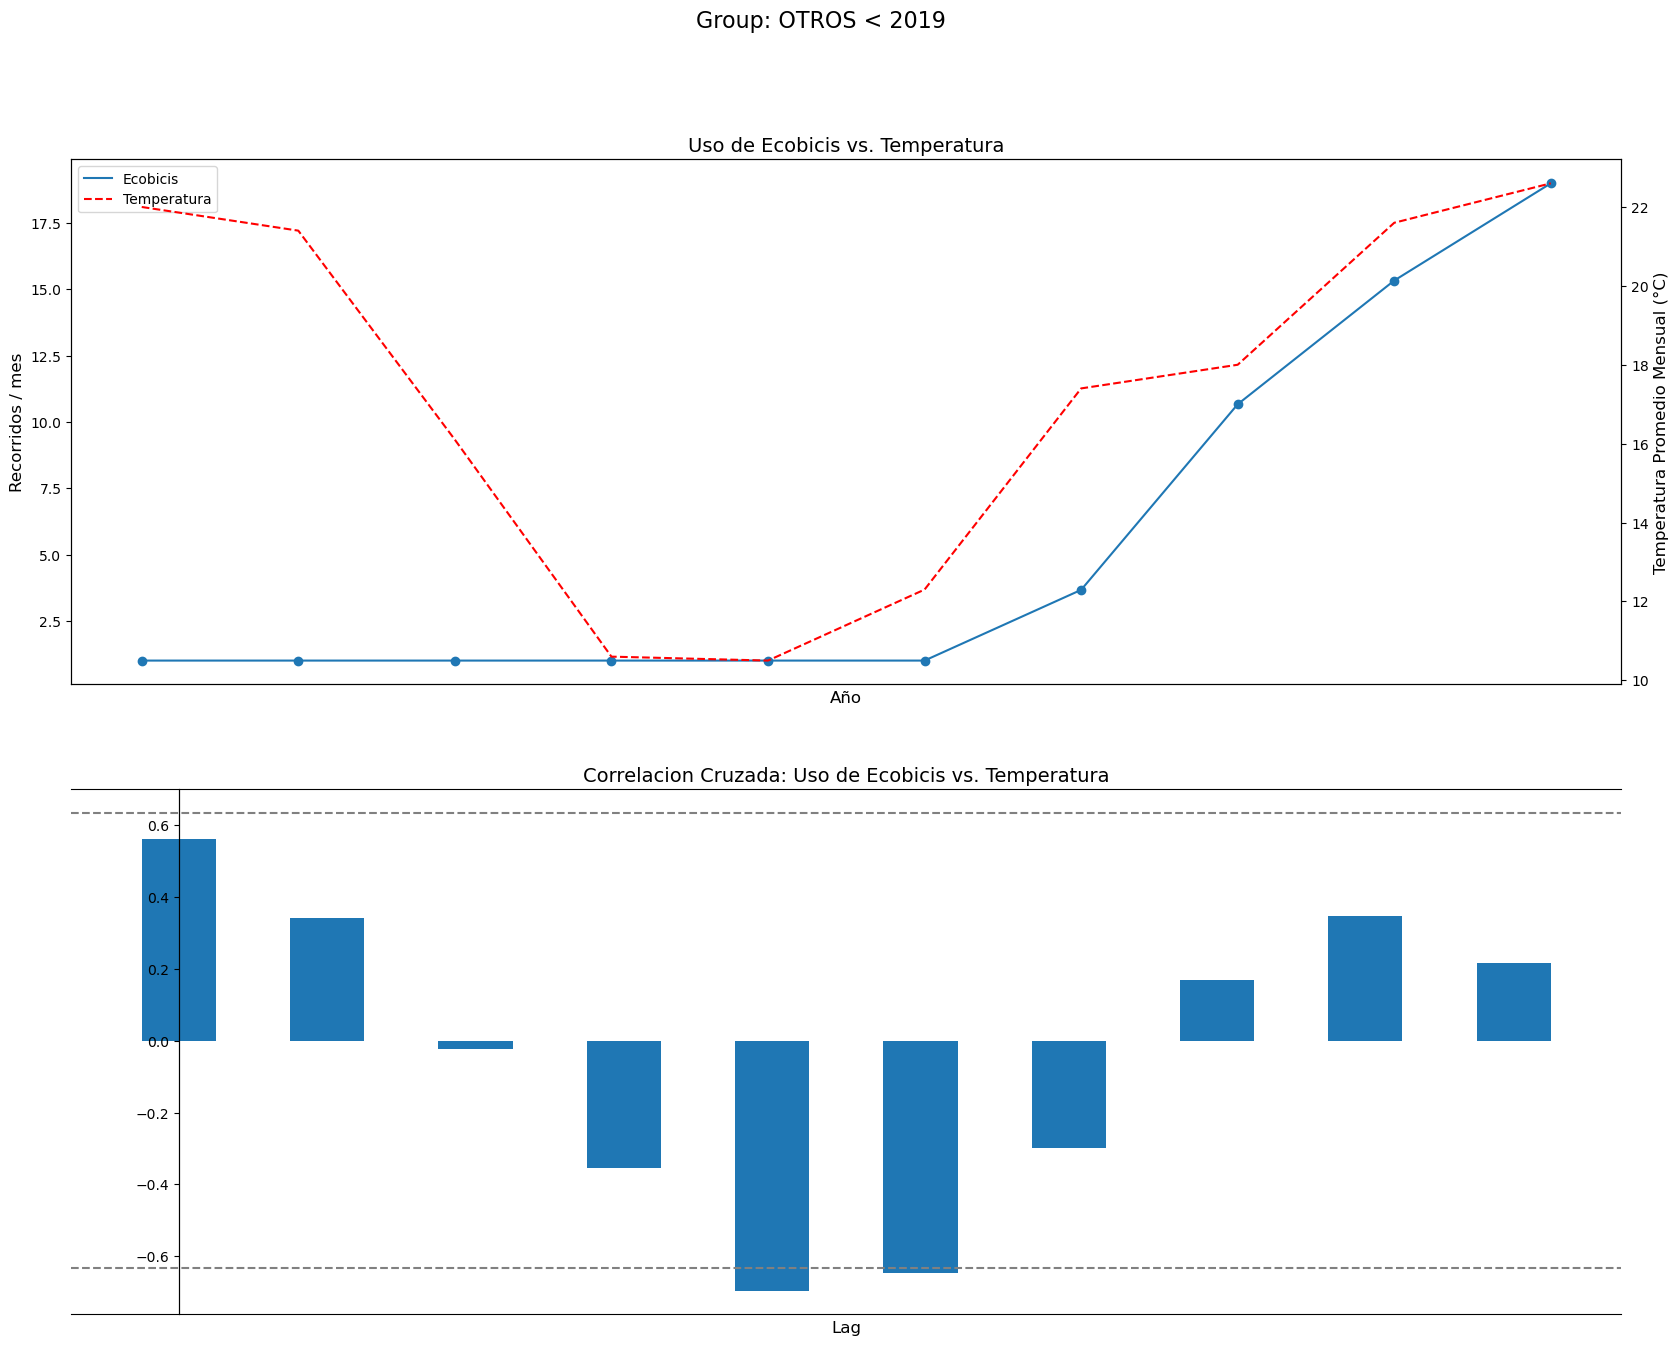

Coeficiente de Correlacion de Pearson: 0.5618267254079805


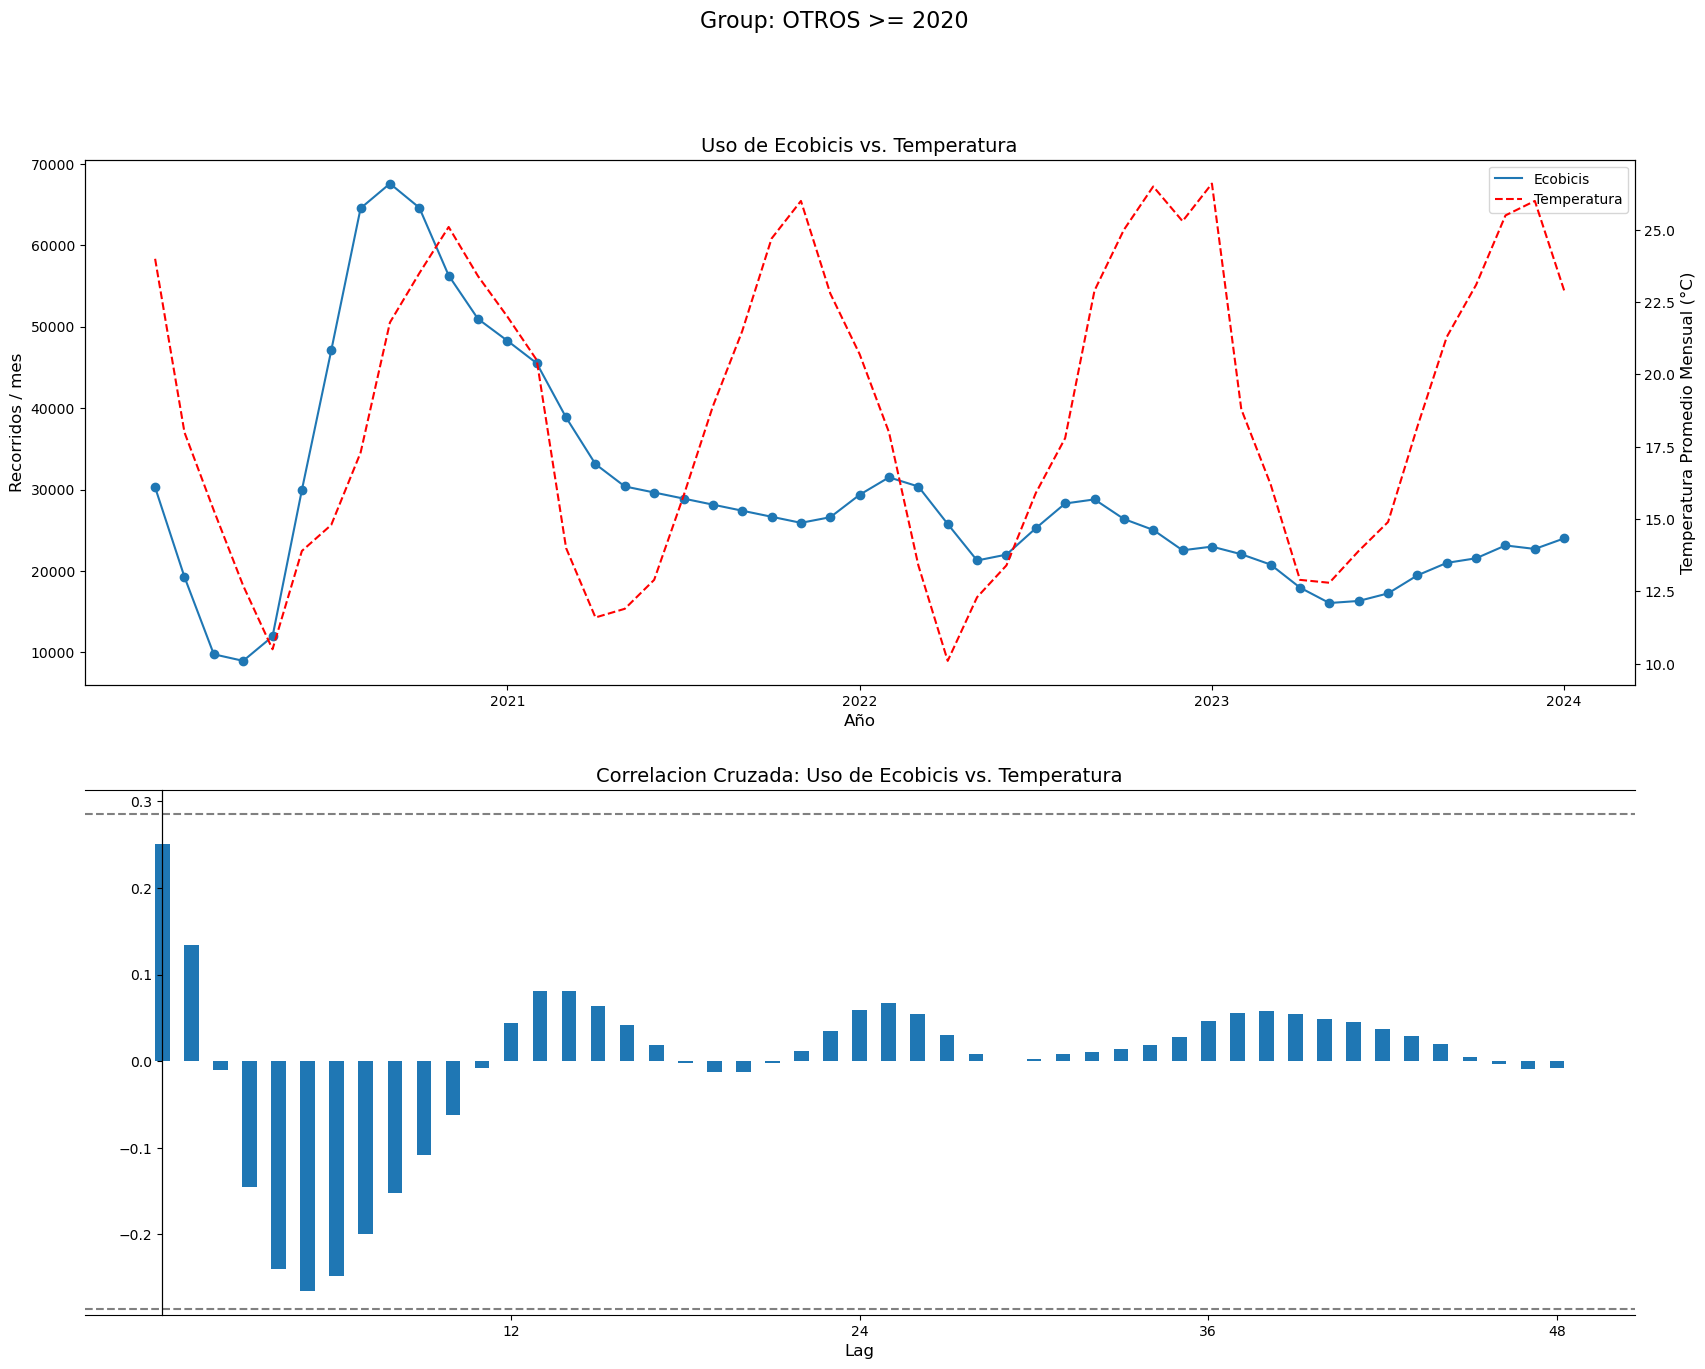

Coeficiente de Correlacion de Pearson: 0.2509500394945606
Grupos que muestran una correlacion considerable (> 0.3): ['TODOS >= 2020', 'HOMBRES >= 2020', 'MUJERES >= 2020', 'OTROS < 2019']


In [9]:
best_groups = []
for name, group_data in test_groups.items():
    ma_data = group_data.copy()
    ma_data["RECORRIDOS_MA"] = group_data["RECORRIDOS"].rolling(window=3).mean()
    ma_data.dropna(inplace=True)

    xticks_data = ma_data[ma_data["MES_NUM"] == 1]
    xticklabels = pd.Series(xticks_data["ANIO"])
    xticks = pd.Series(xticks_data.index.get_level_values(0))

    correlation = correlation_analysis(
        pd.Series(ma_data["RECORRIDOS_MA"]),
        pd.Series(ma_data["TEMP"]),
        title="Uso de Ecobicis vs. Temperatura",
        ts_xlabel="Año",
        ts_ylabel1="Recorridos / mes",
        ts_ylabel2="Temperatura Promedio Mensual (°C)",
        ts_xticks=xticks,
        ts_xticklabels=xticklabels,
        corr_xticks=xticks,
        corr_xticklabels=None,
        ts_plot_opts1={"label": "Ecobicis"},
        ts_plot_opts2={"label": "Temperatura", "color": "red", "linestyle": "--"},
        corr_plot_opts={},
        suptitle=f"Group: {name}",
    )

    if abs(correlation) > 0.3:
        best_groups.append(name)


print("Grupos que muestran una correlacion considerable (> 0.3):", best_groups)